<a href="https://colab.research.google.com/github/mathllorente/ProgrammingAssignment2/blob/master/Matheus_Leite_Llorente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Análise de dados  - ENEM 2019**
### **Por: Matheus Leite Llorente**
Meu Linkedin: https://www.linkedin.com/in/matheus-llorente/


![](https://vertigo.com.br/wp-content/uploads/barra-azul.png)

# **Introdução**

![](https://www.alura.com.br/assets/img/imersoes/general/og-imersao-alura.1595534856.png)

## **O que é/foi a imersão dados 2?**

Muito além do que uma análise, um aprendizado inexplicável!

De 19 a 24 de outubro de 2020, os instrutores da [Alura](https://www.alura.com.br/) (a melhor plataforma de aprendizado para ciência de dados e tecnologia do Brasil) organizaram um evento onde os inscritos puderam analisar uma amostra dos microdados do ENEM 2019. Esses dados estão disponíveis no próprio site do INEP: http://inep.gov.br/microdados.

Foram cinco aulas, diversas lives sobre conteúdos de DataScience e uma comunidade incrível para as análises (além de reuniões diárias com os próprios coordenadores!).

As aulas foram distribuídas por dias, sendo:



1.   **Dia 1: Sua primeira análise de dados**
2.  **Dia 2: Análise Exploratória de Dados**
3.  **Dia 3: Entendendo o que é Machine Learning**
4.   **Dia 4: Otimizando os hiperparâmetros**
5.  **Dia 5: Storytelling em Data Science**

Dentro desses dias, foram propostos diversos desafios aos quais me possibiliaram a desvendar e conhecer mais sobre o universo de Ciência de Dados. Encontrar indicadores, gerar insights, desenvolver análises e relatórios foram ações que fizeram parte do meu cotidiano nesse período e que irão fazer para quaisquer outros.



## **O que irei encontrar por aqui?**

Desde uma análise mais geral, até uma análise mais minuciosa sobre o ENEM 2019 você irá encontrar aqui! 

Gráficos, scripts e relatórios sobre as minhas conclusões como Atuário e Cientista de Dados, estarão disponíveis nas diversas seções. Procurei explorar ao máximo correlações e indicadores que possam elucidar algum tipo de comportamento nas notas e nos candidatos do ENEM de 2019. Utilizei uma amostra considerável, disponibilizada pela [Alura](https://www.alura.com.br/).

# **Resumo sobre as seções**


*   **Bibliotecas utilizadas:** quais pacotes/bibliotecas do Python eu utilizei para realizar as análises;
*   **Análise Geral:** uma análise sobre as idades e o que significam os valores faltantes;
*   **A desigualdade de sexos no ENEM 2019:** uma análise geral e profunda sobre o efeito do sexo nas notas;
*   **A desigualdade de cor das Raças no ENEM2019:** as diferenças e vantagens que uma cor tem sobre a outra;
*   **Média de notas para cada área no Brasil (Mapas):** a média das notas de cada categoria do ENEM por município dispostas por um mapa;
*   **O comportamento das notas no Estado de São Paulo de acordo com o IDH:** a relação entre o IDH municipal e as notas do ENEM para o estado de SP;
*   **Como que a escolaridade dos pais influencia nas notas?:** os efeitos que a escolaridade dos pais tem nas notas de seu filho;
*   **A lingua estrangeira escolhida influencia de que modo no desempenho?:** a diferença de desempenho em quem escolheu Inglês ou Espanhol no ENEM2019;
*   **Taxa de evasão do primeiro para o segundo dia:** como foi a evasão do primeiro para o segundo dia e porquê ocorreram;
*   **Ter internet em casa influencia nas notas?:** a influência que a internet faz nas notas dos candidatos;
*   **Como a renda familiar pode gerar algum efeito nas notas?:** a diferença que a renda familiar faz nas notas dos candidatos;
*   **Análise treineiros do ENEM 2019:** uma breve análise sobre os treineiros e não treineiros no ENEM 2019;
*   **Por que o Sul e o Sudeste se desempenharam melhor?:** motivos pelos quais as regiões Sul e Sudeste foram as melhores no ENEM 2019;
*   **Machine Learning:** como um modelo de machine learning consegue explicar as notas de ciências humanas no enem.




# ***Atenção*  : execute os scripts de acordo com a ordem das seções acima para que não haja conflitos.**

![](https://i.ibb.co/QYh5NYc/Apresenta-o-sem-t-tulo-16.jpg)

# **Bibliotecas utilizadas**

**Bibliotecas**

In [249]:
import os
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import folium
from folium import plugins
import json
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison
from sklearn.model_selection import train_test_split

## **Carregando os dados**

In [250]:
#Coletando a fonte dos dados
font = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true" 

#Utilizando o pandas para ler o arquivo csv
dados_enem2019 = pd.read_csv(font)

#Visualizando as 5 primeiras linhas dos dados carregados
dados_enem2019.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


In [251]:
dados_enem2019.shape #Visualizando o tamanho dos dados

(127380, 136)

*Primordialmente, os dados foram carregados corretamente, contendo 136 variáveis para serem analisadas, cada uma com um fim e uma possível correlação com outra.*

# **Análise Geral**


---


![](https://i.ibb.co/37V0PQs/Apresenta-o-sem-t-tulo-3.jpg)

Para esta ocasião, estarei observando o dataset como um todo. Irei verificar a distribuição das idades, o que significa os valores NaN.

## **Distribuição das idades**

A idade do candidado pode ser explorada pela variável NU_IDADE, portanto, criarei gráficos e dataframes baseados nela.

In [252]:
idades_enem_2019 = dados_enem2019['NU_IDADE'] #Coletando a série
pd.DataFrame(idades_enem_2019.value_counts(normalize = True)) #Verificando a proporção, do maior para o menor

,NU_IDADE
18,0.168409
17,0.166871
19,0.113189
20,0.081748
16,0.061470
...,...
75,0.000016
73,0.000016
82,0.000008
77,0.000008


A idade com maior frequência nos dados da amostra foi de candidatos com 18 anos.

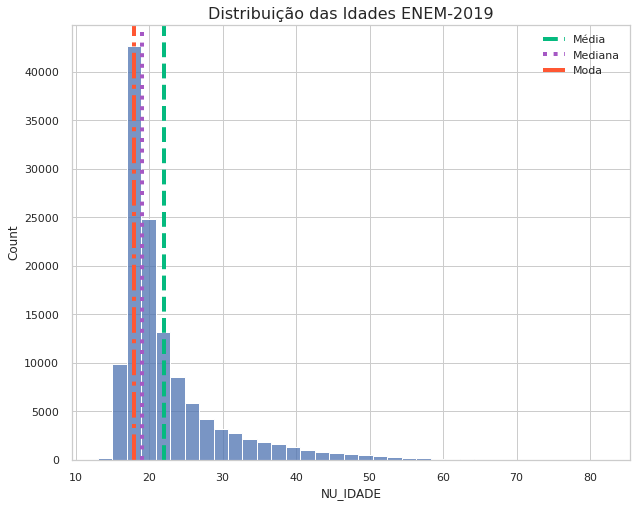

In [253]:
plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")
enem_media_idades = plt.axvline(x = idades_enem_2019.mean(), c = "#05BA7F", linewidth = 4, linestyle = '--')
enem_mediana_idades = plt.axvline(x = idades_enem_2019.median(), c = "#A558C4", linewidth = 4, linestyle = ':')
enem_moda_idades = plt.axvline(x = idades_enem_2019.mode()[0], c = "#FF5733", linewidth = 4, linestyle = '-.')
plt.legend([enem_media_idades, enem_mediana_idades, enem_moda_idades], ['Média', 'Mediana', 'Moda'])
sns.histplot(idades_enem_2019, bins = 35).set_title('Distribuição das Idades ENEM-2019', fontsize = 16);

A partir do grafico acima, é visível que a concentração de dados está por volta dos candidatos entre 17 e 25 anos. Ressalto que o mesmo gráfico se assemelha a uma Distribuição de Poisson.

In [254]:
pd.DataFrame(idades_enem_2019.describe()) #Análise descritiva

,NU_IDADE
count,127380.000000
mean,22.094355
std,7.498707
min,13.000000
25%,18.000000
50%,19.000000
75%,24.000000
max,82.000000


A média de idade, na amostra, é de aproximadamente 22 anos. Entretanto, a mediana é de 19 anos. É possível visualizar que, apesar da idade máxima ser 82 anos, o terceiro quartil está em 24 anos de idade, sendo assim, ao menos 75% dos candidados tinham 24 anos ou menos.
Conclui-se, também, que as idades **NÃO** estão normalmente distribuídas.

### **Encontrando a média de idade por município**

In [255]:
media_idade_municipio = pd.DataFrame(dados_enem2019.groupby(['NO_MUNICIPIO_RESIDENCIA']).mean()['NU_IDADE'])
media_idade_municipio.loc[media_idade_municipio['NU_IDADE'] == media_idade_municipio['NU_IDADE'].max()] #O Município com a média mais alta

,NU_IDADE
NO_MUNICIPIO_RESIDENCIA,
Lagoa dos Patos,50.0


In [256]:
media_idade_municipio.loc[media_idade_municipio['NU_IDADE'] == media_idade_municipio['NU_IDADE'].min()] #O Município com a média mais baixa

,NU_IDADE
NO_MUNICIPIO_RESIDENCIA,
Grupiara,14.0


In [257]:
municipio_idade = media_idade_municipio.index
media_idade_municipio['Cidade'] = municipio_idade
media_idade_municipio.head()

,NU_IDADE,Cidade
NO_MUNICIPIO_RESIDENCIA,,
Abadia de Goiás,22.928571,Abadia de Goiás
Abadia dos Dourados,20.875000,Abadia dos Dourados
Abadiânia,19.181818,Abadiânia
Abaetetuba,23.587879,Abaetetuba
Abaeté,21.769231,Abaeté


**Importarei um dataset que analisa a longitude e latidude de cada município a fim de gerar um gráfico cartográfico**

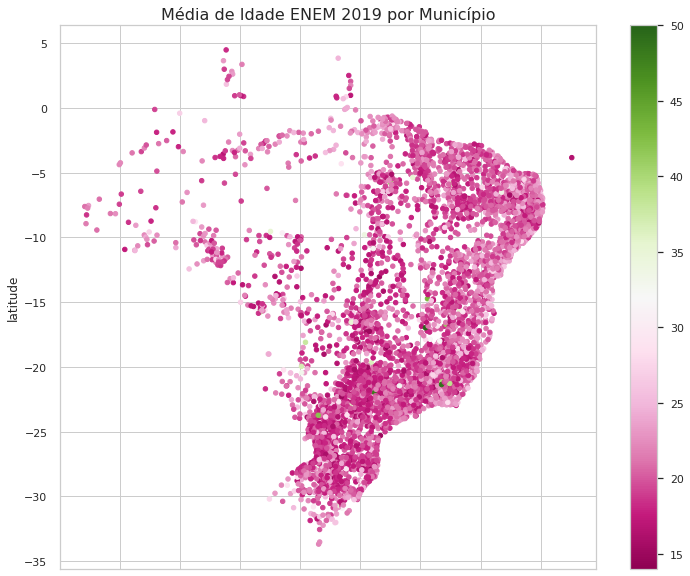

In [258]:
site = 'https://github.com/kelvins/Municipios-Brasileiros/blob/main/csv/municipios.csv?raw=true'

coordenadas = pd.read_csv(site)

concatenado_idade = pd.merge(media_idade_municipio, coordenadas, how = 'left', left_on=['Cidade'], right_on = ['nome'])

concatenado_idade.plot.scatter(y='latitude', x = 'longitude', 
                         c = concatenado_idade['NU_IDADE'],
                         cmap = 'PiYG',
                         figsize = (12,10)).set_title('Média de Idade ENEM 2019 por Município',  fontsize = 16);

No gráfico acima, visualiza-se que a região mais escura (de acordo com a escala) tende à região Sul/Sudeste. Em contrapartida, o nordeste se apresenta levemente com uma cor mais clara. Isso ressalta que, as regiões mais ao Sul do país apresentam idades mais novas em candidatos no ENEM 2019.

Levanto a hipótese de uma possível política de incentivo maior às crianças e aos secundaristas.

**Qual estado predomina com candidatos mais novos?**

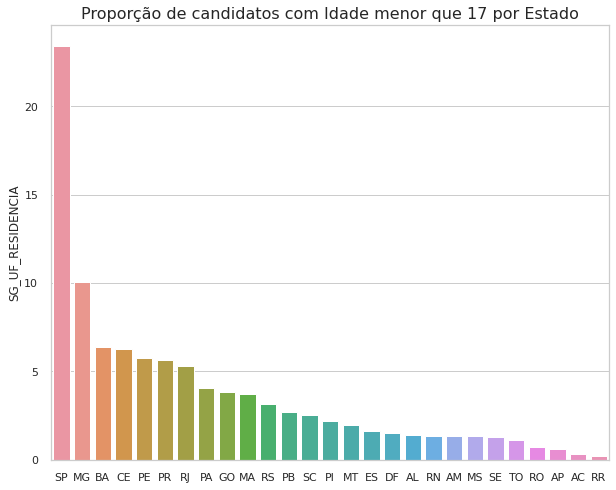

In [259]:
novos_idade_enem2019 = dados_enem2019.query('NU_IDADE <= 17')

prop_novos_idade_enem2019 = pd.DataFrame(novos_idade_enem2019['SG_UF_RESIDENCIA'].value_counts(normalize = True)*100)

#Plotando o gráfico com a escala da proporção 
plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=prop_novos_idade_enem2019.index, y = prop_novos_idade_enem2019['SG_UF_RESIDENCIA'], data=prop_novos_idade_enem2019).set_title('Proporção de candidatos com Idade menor que 17 por Estado',  fontsize = 16)

O Estado com candidatos mais jovens foi o de São Paulo. Em sequência, segue o estado de Minas Gerais. Esse atributo pode reforçar o mapa anterior proposto, demonstrando o escurecimento na região Sudeste e Sul.

### **Qual a idade mais alta que participou no enem do 2019?**

Esta pergunta pode ser respondida pela seguinte análise:

In [260]:
dados_enem2019.loc[dados_enem2019['NU_IDADE'] == dados_enem2019['NU_IDADE'].max()]

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
85002,190004396266,2019,3303302,Niterói,33,RJ,82,F,4,1,1,3303302.0,Niterói,33.0,RJ,1,13,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,B,E,C,2,P,B,C,D,A,A,B,B,B,A,B,A,A,D,B,B,D,B,C,B


*O candidato mais idoso da amostra tinha 82 anos e residia em Niterói.*

### **Qual a idade mais baixa que participou no enem do 2019?**

In [261]:
dados_enem2019.loc[dados_enem2019['NU_IDADE'] == dados_enem2019['NU_IDADE'].min()]

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
57359,190003297248,2019,3504107,Atibaia,35,SP,13,F,1,1,1,3556701.0,Vinhedo,35.0,SP,4,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CAEBCEBECAABCDBEEAEDDBCBACBCECAABDCACEABAEADC,BAAEC99999BCCDDEDACBAADECADBEADBADDBECADEBCBDA...,AABDCEACDDBEDABDDACBDECABACDDBAECDBECBBDEBCDA,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,200.0,200.0,200.0,160.0,920.0,E,G,C,D,3,F,A,C,C,B,A,B,B,B,A,B,A,A,B,A,A,D,B,B,B
95630,190004825557,2019,5107602,Rondonópolis,51,MT,13,M,1,1,1,5107602.0,Rondonópolis,51.0,MT,4,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,C,D,3,F,A,B,C,B,A,B,A,A,A,A,A,A,B,B,A,B,A,A,B
98197,190004926952,2019,1600303,Macapá,16,AP,13,M,1,3,1,1600303.0,Macapá,16.0,AP,4,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G,E,D,B,4,K,B,C,D,B,A,B,B,B,B,B,A,A,C,B,A,E,A,B,B
116501,190005659236,2019,2917508,Jacobina,29,BA,13,M,1,3,1,2304400.0,Fortaleza,23.0,CE,4,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ADCCCCDCEAAABCEEEDAD*CCCDEBADCDBBBCBEBDBDBECC,EBBAD99999BDCBCCBCEBBCADEDDEDECDECDECECACDCECC...,ECEADDBBABCCCDBDCAAECABDCBDBCECCECABCABBBCBAA,0,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,100.0,80.0,100.0,500.0,D,F,D,B,4,D,A,E,E,C,A,B,A,B,A,B,A,A,D,A,B,C,B,C,B


Os candidados mais novos da amostra continham 13 anos de idade e residiam em três estados diferentes: São Paulo, Mato Grosso, Amapá e Bahia.

## **O que significam os valores NaN nas notas do candidato no dataset?**

De fato, todo e qualquer dataset está submetivo à conter valores faltantes. Será que o dataset da amostra obtém dados faltantes?

In [262]:
provas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC']
dados_enem2019[provas].isna().head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC
0,False,False,False,False
1,True,False,True,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False


É possível visualizar que, há valores faltantes apenas pela aparição do True no dataset acima. Por que eles aparecem?

In [263]:
dados_faltantes_notas = dados_enem2019[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_MT', 'TP_PRESENCA_LC']]
dados_faltantes_notas.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_MT,TP_PRESENCA_LC
0,435.6,512.3,432.4,488.6,1,1,1,1
1,NaN,409.3,NaN,375.3,0,1,0,1
2,423.2,499.1,427.2,441.0,1,1,1,1
3,426.2,578.1,499.9,551.5,1,1,1,1
4,516.5,571.3,424.5,511.2,1,1,1,1


A partir da tabela acima,  com o índice igual a 1, é possível relacionar com as faltas dos candidatos nos dias das provas que correspondem aos valores NaN.

# **A desigualdade de sexos no ENEM 2019**


---
![](https://i.ibb.co/zQWzGny/Apresenta-o-sem-t-tulo-22.jpg)


O sexo declarado pelo candidado pode ser explorado pela variável TP_SEXO, portanto, criarei gráficos e dataframes baseados nela.

In [ ]:
sexos_enem_2019 = dados_enem2019['TP_SEXO'] #Coletando a série
sexos_enem_2019 = pd.DataFrame(sexos_enem_2019.value_counts(normalize = True)) #Verificando a proporção, do maior para o menor
sexos_enem_2019

É nítido que, aproximadamente 60% dos candidatos da amostra do ENEM 2019 são do sexo Feminino.

In [ ]:
plt.style.use('seaborn')
sexos_enem_2019.plot.pie(y='TP_SEXO', figsize=(5, 5)).set_title('Distribuição dos Sexos ENEM-2019',  fontsize = 16);

In [ ]:
dist_sexo_por_municipio = pd.crosstab(dados_enem2019.NO_MUNICIPIO_RESIDENCIA, dados_enem2019.TP_SEXO)

dist_sexo_por_municipio['Feminino maior'] = dist_sexo_por_municipio['F'] > dist_sexo_por_municipio['M']

municipio_sexo = dist_sexo_por_municipio.index
dist_sexo_por_municipio['Cidade'] = municipio_sexo
dist_sexo_por_municipio.head()

In [ ]:
concatenado_sexo = pd.merge(dist_sexo_por_municipio, coordenadas, how = 'left', left_on=['Cidade'], right_on = ['nome'])

concatenado_sexo.plot.scatter(y='latitude', x = 'longitude', 
                         c = concatenado_sexo['Feminino maior'],
                         cmap = 'coolwarm',                         
                         figsize = (12,10)).set_title('Municípios distribuídos pela maioria do sexo em candidatos ENEM2019',  fontsize = 16);

plt.text(0, 0, 'Vermelho = Feminino / Azul = Masculino', va = 'center',
        size=30, alpha=.5);

Percebe-se que, a grande maioria dos municípios possui maior participação de pessoas com sexo feminino do que sexo masculino

## **Então, as mulheres tiram as maiores notas? Veremos se ainda há desigualdade**

**Quem tirou acima de 600 em todas as provas, é de qual sexo?**

Essa pergunta pode ser respondida pela filtração dos candidados com notas maiores que 600 e, consequentemente, realizando a frequência de cada sexo.

In [ ]:
alunos_acima = dados_enem2019.query('NU_NOTA_CN > 600 & NU_NOTA_CH > 600 & NU_NOTA_MT > 600 & NU_NOTA_LC > 600')

alunos_acima.head()

In [ ]:
sexo = alunos_acima['TP_SEXO']
sexo = pd.DataFrame(sexo.value_counts())

plt.style.use('seaborn')
sexo.plot.pie(y = 'TP_SEXO', figsize=(5, 5)).set_title('Distribuição dos Sexos de canditados com notas acima de 600 ENEM-2019',  fontsize = 16);

In [ ]:
sexo = alunos_acima['TP_SEXO']
sexo.value_counts(normalize = True)

Apesar da maior quantidade de candidatos do sexo feminino, percebe-se que há um leve equilíbrio de sexo entre os candidatos com notas maiores que 600, com um ganho do sexo masculino em 51,3%.

**Quem tirou acima de 600 em todas as provas, é de onde?**

In [ ]:
estado_aacima = pd.DataFrame(alunos_acima['SG_UF_RESIDENCIA'].value_counts())
estado_aacima.head()

In [ ]:
#Plotando o gráfico com a escala da proporção 
plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=estado_aacima.index, y = estado_aacima['SG_UF_RESIDENCIA'], data=estado_aacima).set_title('Distribuição de candidatos com Idade menor que 17 por Estado',  fontsize = 16)

No gráfico acima, é possível visualizar que, os alunos que tiraram notas maiores que 600 em todas as provas residem, em sua maioria, no estado de São Paulo e posteriormente o estado de Minas Gerais (Os dois estados mais populosos do Brasil segundo o IBGE)

## **Distribuição das notas por sexo**

Utilizarei boxplot. Deixo um breve resumo sobre o que ele é:

![](https://res.cloudinary.com/practicaldev/image/fetch/s--RLvfX5qg--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://miro.medium.com/max/1024/0%2ATmxBdUzCLOmZu6zB.png)

*Fonte: https://dev.to/giselyalves13/visualizacao-de-dados-com-seaborn-2892*

In [ ]:
sexo_ordenado = ['F', 'M']

In [ ]:
plt.figure(figsize=(10, 8))

sns.boxplot(x="NU_NOTA_MT", y = "TP_SEXO", data = dados_enem2019, order = sexo_ordenado)
plt.title("Boxplot das notas de matemática por sexo",  fontsize = 16);

In [ ]:
plt.figure(figsize=(10, 8))

sns.boxplot(x="NU_NOTA_LC", y = "TP_SEXO", data = dados_enem2019, order = sexo_ordenado)
plt.title("Boxplot das notas de linguagens e códigos por sexo",  fontsize = 16);

In [ ]:
plt.figure(figsize=(10, 8))

sns.boxplot(x="NU_NOTA_CN", y = "TP_SEXO", data = dados_enem2019, order = sexo_ordenado)
plt.title("Boxplot das notas de ciências da natureza por sexo",  fontsize = 16);

In [ ]:
plt.figure(figsize=(10, 8))

sns.boxplot(x="NU_NOTA_CH", y = "TP_SEXO", data = dados_enem2019, order = sexo_ordenado)
plt.title("Boxplot das notas de ciências humanas por sexo",  fontsize = 16);

Há um leve deslocamento das notas de quem é do sexo masculino para a direita. Essa diferença é significativa? 

## **Há diferença significativa nas notas das áreas para cada sexo? Testes estatísticos: ANOVA**

**Análise de variância** é a técnica estatística que permite avaliar afirmações sobre as médias de populações. A análise visa, fundamentalmente, verificar se existe uma diferença significativa entre as médias e se os fatores exercem influência em alguma variável dependente. 

*Fonte: https://pt.wikipedia.org/wiki/An%C3%A1lise_de_vari%C3%A2ncia*

Para essa ocasião, estarei criando um modelo de ANOVA para realizar o teste se há diferença significativa entre os sexos. Para identificar, basta que o PR(>F) seja menor que 0,05 (nível de confiança para 95%) para contestar que há. (Hipótese Nula: Não há diferença significativa entre os grupos).

In [ ]:
teste_sexos = dados_enem2019.dropna(subset=['NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_LC', 'NU_NOTA_CH']) #eliminando os valores NaN para tornar o modelo visível e saudável.
teste_sexos.shape

### **Matemática**

In [ ]:
modelo1 = ols('NU_NOTA_MT ~ TP_SEXO', data = teste_sexos).fit()
resultados1 = sm.stats.anova_lm(modelo1)
resultados1

**Rejeitar a hipótese nula.** O resultado demonstra que sim, há diferença significativa entre os grupos nas notas de matemática. (afirmando o argumento da seção acima)

### **Ciências da Natureza**

In [ ]:
modelo2 = ols('NU_NOTA_CN ~ TP_SEXO', data = teste_sexos).fit()
resultados2 = sm.stats.anova_lm(modelo2)
resultados2

**Rejeitar a hipótese nula.** O resultado demonstra que sim, há diferença significativa entre os grupos nas notas de ciências da natureza. (afirmando o argumento da seção acima)

### **Linguagens e Códigos**

In [ ]:
modelo3 = ols('NU_NOTA_LC ~ TP_SEXO', data = teste_sexos).fit()
resultados3 = sm.stats.anova_lm(modelo3)
resultados3

**Rejeitar a hipótese nula.** O resultado demonstra que sim, há diferença significativa entre os grupos nas notas de linguagens e códigos. (afirmando o argumento da seção acima)

### **Ciências Humanas**

In [ ]:
modelo4 = ols('NU_NOTA_CH ~ TP_SEXO', data = teste_sexos).fit()
resultados4 = sm.stats.anova_lm(modelo4)
resultados4

**Rejeitar a hipótese nula.** O resultado demonstra que sim, há diferença significativa entre os grupos nas notas de ciências humanas. (afirmando o argumento da seção acima)

## **Como o Feminismo pode ajudar as mulheres na prova do ENEM**

Irei ressaltar o levantamento de movimentos sociais e linguísticos, como o **Feminismo**. No Brasil, após a Ditadura Militar, no início do Século 21, os movimentos sociais de inclusão ganharam cada vez mais força, principalmente no desenvolver da globalização e a criação de políticas inclusivas pelo próprio Governo Federal. Garantir acessibilidade para grupos distintos, em que **HÁ SIM DESIGUALDADE**, pode refletir até no desempenho educacional. A luta deve ser escutada para que esses resultados não sejam discrepantes como são.

# **A desigualdade de cor das Raças no ENEM2019**
---
![](https://i.ibb.co/8d1PK4X/Apresenta-o-sem-t-tulo-4.jpg)

A cor da raça declarada pelo candidado pode ser explorada pela variável TP_COR_RACA, portanto, criarei gráficos e dataframes baseados nela.

**Criando um dicionário para variável**

In [ ]:
cor_raca = {
    0: 'Não declarado',
    1: 'Branca', 
    2: 'Preta', 
    3: 'Parda', 
    4: 'Amarela', 
    5: 'Indígena'}

**Separando as colunas para análise**

In [ ]:
racas_enem2019 = dados_enem2019[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'TP_COR_RACA', 'SG_UF_RESIDENCIA', 'TP_SEXO']]
racas_enem2019.head()

**Gerando uma coluna com as respostas**

In [ ]:
racas_enem2019['TP_COR_RACA_RESPOSTA'] = [cor_raca[i] for i in racas_enem2019.TP_COR_RACA]
racas_enem2019

**Ordenando as cores das raças em uma lista**

In [ ]:
racas_ordenadas = racas_enem2019['TP_COR_RACA_RESPOSTA'].unique()
racas_ordenadas.sort()

### **Plotando um gráfico com a Distribuição da Cor de Raça no ENEM2019**

In [ ]:
racas_enem_atual = pd.DataFrame(racas_enem2019['TP_COR_RACA_RESPOSTA'].value_counts())

#Plotando o gráfico com a escala da proporção 
plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=racas_enem_atual.index, y = racas_enem_atual['TP_COR_RACA_RESPOSTA'], data=racas_enem_atual, order = racas_ordenadas).set_title('Distribuição candidatos ENEM 2019 por Raça',  fontsize = 16)

É visível que, a maioria dos candidatos são Pardos e, posteriormente, se encontra os candidatos Brancos. 

*De acordo com dados da Pesquisa Nacional por Amostra de Domicílios (PNAD) 2019, 42,7% dos brasileiros se declararam como brancos, 46,8% como pardos, 9,4% como pretos e 1,1% como amarelos ou indígenas.* (https://educa.ibge.gov.br/jovens/conheca-o-brasil/populacao/18319-cor-ou-raca.html#:~:text=De%20acordo%20com%20dados%20da,1%25%20como%20amarelos%20ou%20ind%C3%ADgenas.)

**De acordo com essa referência, é possível relacionar com a própria maioria da população brasileira os dados obtidos.**

### **Quem tira as maiores notas, são de que cor de raça? Há desigualdade?**

In [ ]:
notas_maiores_racas = racas_enem2019.query('NU_NOTA_CN > 600 & NU_NOTA_CH > 600 & NU_NOTA_MT > 600 & NU_NOTA_LC > 600')
notas_maiores_racas_atual = pd.DataFrame(notas_maiores_racas['TP_COR_RACA_RESPOSTA'].value_counts(normalize = True))
notas_maiores_racas_atual

### **Apesar da maioria dos candidatos serem pardos, a maioria das notas (maior que 600) são compostas pela cor Branca com 63,7%**

In [ ]:
plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=notas_maiores_racas_atual.index, y = notas_maiores_racas_atual['TP_COR_RACA_RESPOSTA'], data=notas_maiores_racas_atual,  order = racas_ordenadas).set_title('Distribuição das notas maiores que 600 por raça ENEM 2019',  fontsize = 16)

Observe no gráfico acima que, apesar da maioria da população dos candidatos serem pardos, mais da metade das notas maiores são compostas pela cor Branca. Esse fato pode ser de acordo com o índice de que, a taxa de analfabetismo de Pretos e Pardos acima de 15 anos é mais que duas vezes maios da que dos Brancos, de acordo com o IBGE (Disponível em: https://cidades.ibge.gov.br/brasil/pesquisa/10091/82292. Acesso em: 23 out. 2020.)

Vale ressaltar que, praticamente **0%** dos indígenas tiram notas maiores que 600 em todas as provas 

### **Distribuiçao das notas em cada área por raça ENEM2019**

In [ ]:
plt.figure(figsize=(10, 8))

sns.boxplot(x="NU_NOTA_MT", y = "TP_COR_RACA_RESPOSTA", data = racas_enem2019, order = racas_ordenadas)
plt.title("Boxplot das notas de matemática por cor da raça", fontsize = 16);

In [ ]:
plt.figure(figsize=(10, 8))

sns.boxplot(x="NU_NOTA_LC", y = "TP_COR_RACA_RESPOSTA", data = racas_enem2019, order = racas_ordenadas)
plt.title("Boxplot das notas de linguagens e códigos por cor da raça",  fontsize = 16);

In [ ]:
plt.figure(figsize=(10, 8))

sns.boxplot(x="NU_NOTA_CN", y = "TP_COR_RACA_RESPOSTA", data = racas_enem2019, order = racas_ordenadas)
plt.title("Boxplot das notas de ciências da natureza por cor da raça", fontsize = 16);

In [ ]:
plt.figure(figsize=(10, 8))

sns.boxplot(x="NU_NOTA_CH", y = "TP_COR_RACA_RESPOSTA", data = racas_enem2019, order = racas_ordenadas)
plt.title("Boxplot das notas de ciências humanas por cor da raça", fontsize = 16);

As notas de brancos são consideravelmente maiores em relação às outras cores de raças. O efeito pode ser visto pelas medianas mais deslocadas a direita nos boxplots. Mais alguns gráficos que demonstram a desigualdade social na sociedade brasileira e a falta de democratização no acesso à uma educação de qualidade.

## **Há diferença significativa nas notas das áreas para cada cor? Testes estatísticos: ANOVA, TUKEY**

**Análise de variância** é a técnica estatística que permite avaliar afirmações sobre as médias de populações. A análise visa, fundamentalmente, verificar se existe uma diferença significativa entre as médias e se os fatores exercem influência em alguma variável dependente. 

*Fonte: https://pt.wikipedia.org/wiki/An%C3%A1lise_de_vari%C3%A2ncia*

Para essa ocasião, estarei criando um modelo de ANOVA para realizar o teste se há diferença significativa entre as raças. Para identificar, basta que o PR(>F) seja menor que 0,05 (nível de confiança para 95%) para contestar que há. (Hipótese Nula: Não há diferença significativa entre os grupos).

In [ ]:
teste_racas = racas_enem2019.dropna(subset=['NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_LC', 'NU_NOTA_CH']) #eliminando os valores NaN para tornar o modelo visível e saudável.

### **Matemática**

In [ ]:
modelo1 = ols('NU_NOTA_MT ~ TP_COR_RACA_RESPOSTA', data = teste_racas).fit()
resultados1 = sm.stats.anova_lm(modelo1)
resultados1

**Rejeitar a hipótese nula.** O resultado demonstra que sim, há diferença significativa entre os grupos nas notas de matemática. (afirmando o argumento da seção acima)

In [ ]:
mc = MultiComparison(teste_racas['NU_NOTA_MT'], teste_racas['TP_COR_RACA_RESPOSTA'])
resultado_teste1 = mc.tukeyhsd()
resultado_teste1.summary()

É possível visualizar que, em todos os casos de comparação entre grupos, todos rejeitam a hipótese nula (última coluna) onde há sim diferença significativa entre os grupos.

In [ ]:
resultado_teste1.plot_simultaneous()

Todos os grupos ocupam posições distintas, demonstrando a limitação de desempenho para cada raça (Em matemática).

### **Ciências da Natureza**

In [ ]:
modelo2 = ols('NU_NOTA_CN ~ TP_COR_RACA_RESPOSTA', data = teste_racas).fit()
resultados2 = sm.stats.anova_lm(modelo2)
resultados2

**Rejeitar a hipótese nula.** O resultado demonstra que sim, há diferença significativa entre os grupos nas notas de ciências da natureza. (afirmando o argumento da seção acima)

In [ ]:
mc = MultiComparison(teste_racas['NU_NOTA_CN'], teste_racas['TP_COR_RACA_RESPOSTA'])
resultado_teste2 = mc.tukeyhsd()
resultado_teste2.summary()

É possível visualizar que, em todos os casos de comparação entre grupos, todos rejeitam a hipótese nula (última coluna) onde há sim diferença significativa entre os grupos.

In [ ]:
resultado_teste2.plot_simultaneous()

Todos os grupos ocupam posições distintas, demonstrando a limitação de desempenho para cada raça (Em ciências da natureza).

### **Linguagens e Códigos**

In [ ]:
modelo3 = ols('NU_NOTA_LC ~ TP_COR_RACA_RESPOSTA', data = teste_racas).fit()
resultados3 = sm.stats.anova_lm(modelo3)
resultados3

**Rejeitar a hipótese nula.** O resultado demonstra que sim, há diferença significativa entre os grupos nas notas de linguagens e códigos. (afirmando o argumento da seção acima)

In [ ]:
mc = MultiComparison(teste_racas['NU_NOTA_LC'], teste_racas['TP_COR_RACA_RESPOSTA'])
resultado_teste3 = mc.tukeyhsd()
resultado_teste3.summary()

Partimos agora de uma situação diferente. De fato, a maioria das cores se apresentam em uma diferença significativa, entretanto, as duas últimas da tabela não apresentaram diferença significativa. Entre pretos e pardos, não há diferença significativa. Por quê?

A minha hipótese é de que, apesar de possivelmente houver alguma diferença, o próprio IBGE em sua pesquisa de desigualdade social no Brasil considera Pretos e Pardos na mesma categoria. Essa situação pode sugerir um desempenho parecido entre as duas. (Disponível em: https://cidades.ibge.gov.br/brasil/pesquisa/10091/82292)

In [ ]:
resultado_teste3.plot_simultaneous()

De fato, é possível observar que há uma aproximação das cores Preta e Parda nos gráficos. Já as outras, há uma disparidade exorbitante.

### **Ciências Humanas**

In [ ]:
modelo4 = ols('NU_NOTA_CH ~ TP_COR_RACA_RESPOSTA', data = teste_racas).fit()
resultados4 = sm.stats.anova_lm(modelo4)
resultados4

**Rejeitar a hipótese nula.** O resultado demonstra que sim, há diferença significativa entre os grupos nas notas de ciências humanas. (afirmando o argumento da seção acima)

In [ ]:
mc = MultiComparison(teste_racas['NU_NOTA_CH'], teste_racas['TP_COR_RACA_RESPOSTA'])
resultado_teste4 = mc.tukeyhsd()
resultado_teste4.summary()

Observe a mesma situação de linguagens e códigos, onde há uma disparidade entre as outras raças, mas entre pardos e pretos não. De fato, é um efeito importante

In [ ]:
resultado_teste3.plot_simultaneous()

É possível observar que há uma aproximação das cores Preta e Parda nos gráficos. Já as outras, há uma disparidade exorbitante.

# **Média de notas para cada área no Brasil (Mapas)**


---

![](https://i.ibb.co/wL9xDhj/Apresenta-o-sem-t-tulo-5.jpg)

Nesta seção irei realizar gráficos de mapas para analisar as médias para cada área da prova do ENEM 2019 em cada município disponível na amostra. Para isso utilizarei o dataframe já importado como nome de: coordenadas.

In [ ]:
coordenadas.head()

Utilizarei esse dataset para concatenar os valores das coordenadas a fim de elucidar um mapa de acordo com a média das notas em cada área para cada município, conforme as seções a seguir.

In [ ]:
dados_municipios_gerais_medias = dados_enem2019.copy()
nota_media_geral_municipio = dados_municipios_gerais_medias.groupby(['NO_MUNICIPIO_RESIDENCIA']).mean()[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']]
nota_media_geral_municipio['Municipio'] = nota_media_geral_municipio.index
nota_media_geral_municipio.head()

## **Matemática**

In [ ]:
concatenado_matematica = pd.merge(nota_media_geral_municipio, coordenadas, how = 'left', left_on=['Municipio'], right_on = ['nome'])

concatenado_matematica.plot.scatter(y='latitude', x = 'longitude', 
                         c = concatenado_matematica['NU_NOTA_MT'],
                         cmap = 'RdYlGn',
                         figsize = (12,10)).set_title('Média da nota em Matemática ENEM 2019 por Município',  fontsize = 16);

Pelo gráfico acima, é possível visualizar um clareamento na tonalidade das cores ao tender no Sul/Sudeste. O efeito contrátio acontece ao se direcionar para o Norte/Nordeste. Esse gráfico pode demonstrar a ainda presente desigualdade social presente no Brasil, como também um alto deficit na educação dita a disparidade de notas. É visível, também, que o Brasil de um modo geral NÃO desempenhou bem na área de Matemática.

## **Ciências da Natureza**

In [ ]:
concatenado_cn = pd.merge(nota_media_geral_municipio, coordenadas, how = 'left', left_on=['Municipio'], right_on = ['nome'])

concatenado_cn.plot.scatter(y='latitude', x = 'longitude', 
                         c = concatenado_cn['NU_NOTA_CN'],
                         cmap = 'RdYlGn',
                         figsize = (12,10)).set_title('Média em notas de Ciências da Natureza ENEM 2019 por Município',  fontsize = 16);

Novamente, o mesmo efeito ocorre com a área de Ciências da Natureza, onde há uma forte sobreposição do Sudeste e do Sul sob as outras regiões. Mais um ponto de desigualdade social. Com isso, é fato e claro onde há uma necessidade de investimento nessas áreas. 

**Ciências da Natureza agrega Física, Química e Biologia. Uma proposta, levantando a minha hipótese, seria levantar investimentos em laboratórios em escolas, com também propor experiências de campo para os dicentes a fim de estimular um contato maior com essa área.**

## **Ciências Humanas**

In [ ]:
concatenado_ch = pd.merge(nota_media_geral_municipio, coordenadas, how = 'left', left_on=['Municipio'], right_on = ['nome'])

concatenado_ch.plot.scatter(y='latitude', x = 'longitude', 
                         c = concatenado_ch['NU_NOTA_CH'],
                         cmap = 'RdYlGn',
                         figsize = (12,10)).set_title('Média em notas de Ciências Humanas ENEM 2019 por Município',  fontsize = 16);

Apesar dos gráficos anteriores demonstrar uma maior disparidade entre as notas das áreas, em Ciências Humanas os alunos em geral desempenharam melhor. Entretanto, é possível visualizar, ainda, um pequeno nuance na tonalidade das notas em comparação Sul/Sudeste - Norte/Nordeste.

## **Linguagens e Códigos**

Como já visto anteriormente, estou eliminando os valores NaN pois estou considerando-os como a não presença no dia da prova.

In [ ]:
concatenado_lc = pd.merge(nota_media_geral_municipio, coordenadas, how = 'left', left_on=['Municipio'], right_on = ['nome'])

concatenado_lc.plot.scatter(y='latitude', x = 'longitude', 
                         c = concatenado_lc['NU_NOTA_LC'],
                         cmap = 'RdYlGn',
                         figsize = (12,10)).set_title('Média em notas de Linguagens e CódigosENEM 2019 por Município',  fontsize = 16);

A dose se repete. Novamente o Brasil de um modo geral se apresenta em um desempenho razoável, entretanto, com predominância da região ao Sul (verde mais forte.

## **Redação**

Como já visto anteriormente, estou eliminando os valores NaN pois estou considerando-os como a não presença no dia da prova.

In [ ]:
concatenado_red = pd.merge(nota_media_geral_municipio, coordenadas, how = 'left', left_on=['Municipio'], right_on = ['nome'])

concatenado_red.plot.scatter(y='latitude', x = 'longitude', 
                         c = concatenado_red['NU_NOTA_REDACAO'],
                         cmap = 'RdYlGn',
                         figsize = (12,10)).set_title('Média em notas de Redação ENEM 2019 por Município',  fontsize = 16);

Um pouco diferente dos gráficos anteriores, a região Sudeste foi a que mais se destacou nos gráficos. Novamente, a prevalencia das notas menores se dá no Norte e Nordeste.

# **O comportamento das notas no Estado de São Paulo de acordo com o IDH**


---

![](https://i.ibb.co/1MJxDVn/Apresenta-o-sem-t-tulo-6.jpg)

A fim de analisar o estado em que resido, importarei os dados referente ao próprio estado para cada município a fim de coletar algumas informações. Os dados foram obtidos do próprio site do IBGE.

*Referência: https://www.ibge.gov.br/cidades-e-estados/sp/sao-paulo.html*

**Importando os dados**

In [ ]:
dados_sp = pd.read_csv('https://raw.githubusercontent.com/mathllorente/idh/main/DADOS_SP_MUNICIPIOS.csv', sep = ';', encoding="ISO-8859-1")
sp_dados = dados_enem2019.loc[dados_enem2019['SG_UF_RESIDENCIA'] == 'SP'][['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'TP_COR_RACA', 'SG_UF_RESIDENCIA', 'TP_SEXO', 'NO_MUNICIPIO_RESIDENCIA']].dropna(subset=['NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_LC', 'NU_NOTA_CH'])

dados_sp.head()

**Gerando a média por município (SP)**

In [ ]:
nota_media_sp = sp_dados.groupby(['NO_MUNICIPIO_RESIDENCIA']).mean()[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC']]
nota_media_sp['Municipio'] = nota_media_sp.index
nota_media_sp.head()

**Plotando os gráficos de dispersão**

In [ ]:
concatenado_sp = pd.merge(nota_media_sp, dados_sp, how = 'left', left_on=['Municipio'], right_on = ['Município'])
idh_medias_sp = concatenado_sp[['Municipio', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'IDHM_2010']]

plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.title('Relação entre IDH do município e a média em Ciências da Natureza')
plt.scatter(data = idh_medias_sp, y = 'NU_NOTA_CN', x = 'IDHM_2010');
plt.subplot(2,2,2)
plt.title('Relação entre IDH do município e a média em Ciências Humanas')
plt.scatter(data = idh_medias_sp, y = 'NU_NOTA_CH', x = 'IDHM_2010');
plt.subplot(2,2,3)
plt.title('Relação entre IDH do município e a média em Matemática')
plt.scatter(data = idh_medias_sp, y = 'NU_NOTA_MT', x = 'IDHM_2010');
plt.subplot(2,2,4)
plt.title('Relação entre IDH do município e a média em Linguagens e Códigos')
plt.scatter(data = idh_medias_sp, y = 'NU_NOTA_LC', x = 'IDHM_2010');

Visualmente os dados se dispersam muito em relação ao IDH do município.

In [ ]:
correlacao_sp = idh_medias_sp[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'IDHM_2010']].corr()
sns.heatmap(correlacao_sp, cmap="Blues", center=0, annot=True);

Os valores acima são interpretados pela seguinte proposta:

*Fonte: http://leg.ufpr.br/~silvia/CE003/node74.html*

![](https://i.ibb.co/BGjBvwz/Apresenta-o-sem-t-tulo-21.jpg)

De fato, há uma fraca relação entre o IDH e as provas. As que mais se destacaram pela relação foi a de Ciências da Natureza e de Ciências Humanas.  Apesar de haver uma correlação fraca (não se é esperada uma correlação forte, dito que é apenas um evento de muitos) o IDH tem sim sua influência nas notas do ENEM.

Esse fator é visível a partir dos gráficos, onde há uma mínima inclinação positiva da esquerda para direita, em que quanto maior o IDH maior serão as notas. 

#**Como que a escolaridade dos pais influencia nas notas?**


---

![](https://i.ibb.co/52gWrSd/Apresenta-o-sem-t-tulo-9.jpg)

Nesta ocasião, estarei analisando a relação entre a escolaridade dos pais dos candidados e seu desempenho nas provas.  Para isso, utilizarei as variáveis **Q001** e **Q002**

**Q001** Até que série seu pai, ou o homem responsável por você, estudou?

**Q002** Até que série sua mãe, ou a mulher responsável por você, estudou?

**Criando um dicionário com as respostas para as questões e criando uma coluna para elucidar a resposta**

In [ ]:
respostas_escolaridade_pais = {
    'A': 'Nunca estudou.',
    'B': 'Não completou a 4ª série/5º ano do Ensino Fundamental.',
    'C': 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.',
    'D': 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.',
    'E': 'Completou o Ensino Médio, mas não completou a Faculdade.',
    'F': 'Completou a Faculdade, mas não completou a Pós-graduação.',
    'G': 'Completou a Pós-graduação.',
    'H': 'Não sei.'
}

In [ ]:
influencia_pais = dados_enem2019[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'Q001', 'Q002', 'SG_UF_RESIDENCIA', 'NO_MUNICIPIO_RESIDENCIA']]
influencia_pais['Q001_RESPOSTA_PAI'] = [respostas_escolaridade_pais[respostas] for respostas in influencia_pais.Q001]
influencia_pais['Q002_RESPOSTA_MAE'] = [respostas_escolaridade_pais[respostas] for respostas in influencia_pais.Q002]
influencia_pais

**Analisando a distribuição das respostas referente ao Pai**

In [ ]:
pai = pd.DataFrame(influencia_pais.Q001_RESPOSTA_PAI.value_counts())
pai

In [ ]:
pai.plot.barh().set_title('Escolaridade dos Pais dos candidatos ENEM 2019', fontsize = 16);

**Analisando a distribuição das respostas referente à Mãe**

In [ ]:
mae = pd.DataFrame(influencia_pais.Q002_RESPOSTA_MAE.value_counts())
mae

In [ ]:
mae.plot.barh().set_title('Escolaridade das Mães dos candidatos ENEM 2019',  fontsize = 16);

É possível visualizar, nas tabelas acima, que a questão respondida por "Não Sei." no caso do pai é de 11002 e no caso da mãe é de 3666. **Levanto a hipótese de uma possível evasão dos pais nas famílias, sendo mais presente a mãe.**

In [ ]:
pai['Q001_RESPOSTA_PAI'].loc[pai.index == 'Completou a Pós-graduação.'][0]/mae.sum()*100 #Proporção para pais com pós-graduação

In [ ]:
mae['Q002_RESPOSTA_MAE'].loc[mae.index == 'Completou a Pós-graduação.'][0]/mae.sum()*100 #Proporção para mães com pós-graduação

##**Como uma política histórica influencia na nota do seu filho**

**Como é a distribuição de escolaridade a nível de Pós-graduação do pai e da mãe pelo país?**

In [ ]:
pai_com_pos = influencia_pais.loc[influencia_pais['Q001_RESPOSTA_PAI'] == 'Completou a Pós-graduação.']
estado_pai_com_pos = pai_com_pos['SG_UF_RESIDENCIA'].value_counts()
municipios_pai = estado_pai_com_pos.index
estado_pai_com_pos = pd.DataFrame(estado_pai_com_pos)
estado_pai_com_pos['Estado'] = municipios_pai
estado_pai_com_pos.head()

In [ ]:
estado_pai_com_pos.plot.barh(figsize=(10, 8)).set_title('Distribuição dos pais dos candidatos ENEM2019 que tem Pós-graduação por Estado',  fontsize = 16);

In [ ]:
mae_com_pos = influencia_pais.loc[influencia_pais['Q002_RESPOSTA_MAE'] == 'Completou a Pós-graduação.']
estado_mae_com_pos = mae_com_pos['SG_UF_RESIDENCIA'].value_counts()
municipios_mae = estado_mae_com_pos.index
estado_mae_com_pos = pd.DataFrame(estado_mae_com_pos)
estado_mae_com_pos['Estado'] = municipios_mae
estado_mae_com_pos.head()

In [ ]:
estado_mae_com_pos.plot.barh(figsize=(10, 8)).set_title('Distribuição das mães dos candidatos ENEM2019 que tem Pós-graduação por Estado',  fontsize = 16);

Majoritariamente o Estado de São Paulo ocupa a primeira posição, em segundo o estado de Minas Gerais. Portanto, os Estados do sudeste apresentam uma representatividade maior no páis conquanto aos pais com uma escolaridade mais desenvolvida.
Esse fator pode ser histórico. É possível relacionar, tanto pela população maior, quanto pela política **Café com Leite** executada na República Velha, onde os Estados de Minas Gerais e São Paulo foram predominantes no período ante 1930. Diante disso, com a riqueza, é possível relacionar um possível cunho histórico, tanto de desenvolvimento econômico, quanto de incentivo educacional e social.

**Como é o comportamento da escolaridade nas notas maiores?**

In [ ]:
notas_maiores_pai = influencia_pais.query('NU_NOTA_CN > 600 & NU_NOTA_CH > 600 & NU_NOTA_MT > 600 & NU_NOTA_LC > 600')
notas_maiores_pai_atual = pd.DataFrame(notas_maiores_pai['Q001_RESPOSTA_PAI'].value_counts(normalize = True))
notas_maiores_pai_atual

In [ ]:
notas_maiores_pai_atual.plot.barh().set_title('Escolaridade dos Pais dos candidatos com notas maiores que 600 ENEM 2019',  fontsize = 16);

In [ ]:
notas_maiores_mae = influencia_pais.query('NU_NOTA_CN > 600 & NU_NOTA_CH > 600 & NU_NOTA_MT > 600 & NU_NOTA_LC > 600')
notas_maiores_mae_atual = pd.DataFrame(notas_maiores_mae['Q002_RESPOSTA_MAE'].value_counts(normalize = True))
notas_maiores_mae_atual

In [ ]:
notas_maiores_mae_atual.plot.barh().set_title('Escolaridade das Mães dos candidatos com notas maiores que 600 ENEM 2019',  fontsize = 16);

É nítido que, quanto mais desenvolvida a escolaridade dos pais, melhor é o desempenho de seus filhos.

**HIPÓTESE:**Além da maior presença da mãe nas famílias, a escolaridade da mãe quanto mais desenvolvida (tende à pós-gradruação) é, maior é a chance do filho tirar notas maiores que 600. Em contrapartida, a escolaridade do pai se encontra em proporções mais suaves quanto ao desenvolvimento. 
Portanto, a influência maior é com respeito à escolaridade da própria mãe.

**É importante ressaltar que,** apesar da influência mais significativa ser pela pós-graduação, apenas 7,9% das mães possuem pós-graduação completa.

**Como é a distribuição das notas com candidatos que tem mãe com pós completa?**

In [ ]:
mae_com_pos.head()

In [ ]:
plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")
sns.histplot(data = mae_com_pos).set_title('Distribuição das notas dos candidatos que tem mãe com pós completa ENEM2019',  fontsize = 16);

In [ ]:
plt.figure(figsize=(10, 8))
mae_com_pos.boxplot().set_title('Distribuição das notas dos candidatos que tem mãe com pós completa ENEM2019',  fontsize = 16);

In [ ]:
mae_com_pos.describe()

**Comparando com a distribuição das mães que não possuem pós**

In [ ]:
mae_sem_pos = influencia_pais.loc[influencia_pais['Q002_RESPOSTA_MAE'] != 'Completou a Pós-graduação.']
plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")
sns.histplot(data = mae_sem_pos).set_title('Distribuição das notas dos candidatos que tem mãe sem pós completa ou inferior ENEM2019',  fontsize = 16);

In [ ]:
plt.figure(figsize=(10, 8))
mae_sem_pos.boxplot().set_title('Distribuição das notas dos candidatos que tem mãe sem pós completa ou inferior ENEM2019',  fontsize = 16);

In [ ]:
mae_sem_pos.describe()

Dado o exposto das tabelas e dos gráficos, é visível que, as médias dos alunos com mãe com pós completa são maiores daqueles que não tem. É importante ressaltar que, as notas deles também são mais próximas de uma distribuição normal, comparando os histogramas (analisando a simetria dos gráficos para cada área). Um ponto importante a se ressaltar é que, na área de **Ciências da Natureza** nenhum aluno com mãe com pós tirou zero, diferente daqueles que não tem que houve nota zero (além se assemelhar com uma distribuição de poisson).

## **Visualização Geral das notas por Escolaridade da mãe**

In [ ]:
plt.figure(figsize=(20, 10))
sns.boxplot(x= "NU_NOTA_MT", y ="Q002_RESPOSTA_MAE", data = influencia_pais)
plt.title("Boxplot das notas de matemática pelo escolaridade da mãe",  fontsize = 16);

In [ ]:
plt.figure(figsize=(20, 10))
sns.boxplot(x= "NU_NOTA_LC", y ="Q002_RESPOSTA_MAE", data = influencia_pais)
plt.title("Boxplot das notas de linguagens e códigos pelo escolaridade da mãe",  fontsize = 16);

In [ ]:
plt.figure(figsize=(20, 10))
sns.boxplot(x= "NU_NOTA_CH", y ="Q002_RESPOSTA_MAE", data = influencia_pais)
plt.title("Boxplot das notas de ciências humanas pelo escolaridade da mãe",  fontsize = 16);

In [ ]:
plt.figure(figsize=(20, 10))
sns.boxplot(x= "NU_NOTA_CN", y ="Q002_RESPOSTA_MAE", data = influencia_pais)
plt.title("Boxplot das notas de ciências da natureza pelo escolaridade da mãe",  fontsize = 16);

Com os gráficos acima, é possível constatar o efeito da escolaridade das mães no desempenho de seus filhos. A distribuição das notas dos filhos de quem tem pós-completa é mais deslocada para direita (nota maior) do que as de quem Nunca Estudou (contém as menores notas).

## **Há diferença significativa nas notas das áreas para a escolaridade da mãe? Testes estatísticos: ANOVA, TUKEY**

**Análise de variância** é a técnica estatística que permite avaliar afirmações sobre as médias de populações. A análise visa, fundamentalmente, verificar se existe uma diferença significativa entre as médias e se os fatores exercem influência em alguma variável dependente. 

*Fonte: https://pt.wikipedia.org/wiki/An%C3%A1lise_de_vari%C3%A2ncia*

Para essa ocasião, estarei criando um modelo de ANOVA para realizar o teste se há diferença significativa entre as escolaridades das mães. Para identificar, basta que o PR(>F) seja menor que 0,05 (nível de confiança para 95%) para contestar que há. (Hipótese Nula: Não há diferença significativa entre os grupos).

In [ ]:
teste_escolaridade_mae = influencia_pais.dropna(subset=['NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_LC', 'NU_NOTA_CH']) #eliminando os valores NaN para tornar o modelo visível e saudável.

Irei utilizar as respostas pelas alternativas, a fim de tornar a visualização das tabelas mais clara. Portanto, estou deixando aqui o que significa cada resposta:

**A:** 'Nunca estudou.'

**B:** 'Não completou a 4ª série/5º ano do Ensino Fundamental.',

**C:**'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.',

**D:** 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.',

**E:**'Completou o Ensino Médio, mas não completou a Faculdade.',

**F:** 'Completou a Faculdade, mas não completou a Pós-graduação.',

**G:**'Completou a Pós-graduação.',

**H:** 'Não sei.'

### **Matemática**

In [ ]:
modelo1 = ols('NU_NOTA_MT ~ Q002_RESPOSTA_MAE', data = teste_escolaridade_mae).fit()
resultados1 = sm.stats.anova_lm(modelo1)
resultados1

**Rejeitar a hipótese nula.** O resultado demonstra que sim, há diferença significativa entre os grupos nas notas de matemática. (afirmando o argumento da seção acima)

In [ ]:
mc = MultiComparison(teste_escolaridade_mae['NU_NOTA_MT'], teste_escolaridade_mae['Q002'])
resultado_teste1 = mc.tukeyhsd()
resultado_teste1.summary()

É nítido que há uma diferença significativa entre todas as escolaridades. Ademais, é possível ressaltar que NÃO HÁ DIFERENÇA SIGNIFICATIVA entre as mães que Não completou a 4ª série/5º ano do Ensino Fundamental e as que os candidatos Não sabem. 

### **Ciências da Natureza**

In [ ]:
modelo2 = ols('NU_NOTA_CN ~ Q002_RESPOSTA_MAE', data = teste_escolaridade_mae).fit()
resultados2 = sm.stats.anova_lm(modelo2)
resultados2

**Rejeitar a hipótese nula.** O resultado demonstra que sim, há diferença significativa entre os grupos nas notas de ciências da natureza. (afirmando o argumento da seção acima)

In [ ]:
mc = MultiComparison(teste_escolaridade_mae['NU_NOTA_CN'], teste_escolaridade_mae['Q002'])
resultado_teste2 = mc.tukeyhsd()
resultado_teste2.summary()

Novamente, a dose anterior se repete. Não há diferença entre a categoria B e H.

### **Linguagens e Códigos**

In [ ]:
modelo3 = ols('NU_NOTA_LC ~ Q002_RESPOSTA_MAE', data = teste_escolaridade_mae).fit()
resultados3 = sm.stats.anova_lm(modelo3)
resultados3

**Rejeitar a hipótese nula.** O resultado demonstra que sim, há diferença significativa entre os grupos nas notas de linguagens e códigos. (afirmando o argumento da seção acima)

In [ ]:
mc = MultiComparison(teste_escolaridade_mae['NU_NOTA_LC'], teste_escolaridade_mae['Q002'])
resultado_teste3 = mc.tukeyhsd()
resultado_teste3.summary()

Novamente, o efeito se repete.

### **Ciências Humanas**

In [ ]:
modelo4 = ols('NU_NOTA_CH ~ Q002_RESPOSTA_MAE', data = teste_escolaridade_mae).fit()
resultados4 = sm.stats.anova_lm(modelo4)
resultados4

**Rejeitar a hipótese nula.** O resultado demonstra que sim, há diferença significativa entre os grupos nas notas de ciências humanas. (afirmando o argumento da seção acima)

In [ ]:
mc = MultiComparison(teste_escolaridade_mae['NU_NOTA_CH'], teste_escolaridade_mae['Q002'])
resultado_teste4 = mc.tukeyhsd()
resultado_teste4.summary()

De fato, EM TODAS AS ÁREAS, todas as escolaridades fazem diferença entre elas, menos entre a categoria B e H.

### **Conclusão escolaridade mãe**
De fato, a mãe ter uma escolaridade mais desenvolvida faz diferença, entretanto, não faz diferença se a mãe tem escolaridade que o filho não sabe ou que Não completou a 4ª série/5º ano do Ensino Fundamental.

## **O comportamento das notas em Ciências Humanas de candidato com mãe certificada com pós-graduação completa**

É perceptível uma possível simetria e coerência no boxplot gerado com as notas de Ciências Humanas. Irei plotar um histograma com os mesmos dados.

In [ ]:
plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")
enem_media_mae= plt.axvline(x = mae_com_pos['NU_NOTA_CH'].mean(), c = "#05BA7F", linewidth = 4, linestyle = '--')
enem_mediana_mae = plt.axvline(x = mae_com_pos['NU_NOTA_CH'].median(), c = "#A558C4", linewidth = 4, linestyle = ':')
enem_moda_mae = plt.axvline(x = mae_com_pos['NU_NOTA_CH'].mode()[0], c = "#FF5733", linewidth = 4, linestyle = '-.')
plt.legend([enem_media_mae, enem_mediana_mae, enem_moda_mae], ['Média', 'Mediana', 'Moda'])
sns.histplot(mae_com_pos['NU_NOTA_CH'], bins = 35).set_title('Distribuição das notas em Ciências Humanas dos candidatos com mãe que possui pós-graduação ENEM2019',  fontsize = 16);

In [ ]:
 #Gerando a linha de densidade
sns.distplot(a = mae_com_pos['NU_NOTA_CH']).set_title('Distribuição das notas em Ciências Humanas dos candidatos com mãe que possui pós-graduação ENEM2019',  fontsize = 16);

Instigado com o formato de sino, decidi verificar a partir de um teste de hipótese para verificar se os dados estão normalmente distribuídos.

### **Teste de Shapiro-Wilk**

A fim de que uma distribuição seja normal, neste teste de hipótese o p-value deve ser **maior que 0,05**

Eliminando os valores NaN

In [ ]:
ch_mae_pos = mae_com_pos['NU_NOTA_CH'].dropna()
ch_mae_pos.shape

Gerando uma amostra aleatória, a fim de diminuir o dataset (a função shapiro se limita a 5000 instâncias)

In [ ]:
np.random.seed(123)
amostra = np.random.choice(a = [0,1], size = len(ch_mae_pos), replace = True, p = [0.3,0.7])
amostra_ch_mae_pos = ch_mae_pos.loc[amostra == 0]
amostra_ch_mae_pos.shape

Utilizando a função shapiro do módulo stats do pacore scipy

In [ ]:
stats.shapiro(amostra_ch_mae_pos)[1]

O valor p-value, por consequência, declara que os valores das notas não estão efetivamente normalmente distribuidos. Entretanto, o formato de sino, a aproximação da média para mediana nos deduz uma tendência à normalização, **diferente do formato dos candidatos que a mãe não possui pós completa, onde há uma distorção maior.**

# **A lingua estrangeira escolhida influencia de que modo no desempenho?**


---

![](https://i.ibb.co/Jnr5phs/Apresenta-o-sem-t-tulo-10.jpg)

Na prova do ENEM é possível escolher duas línguas para realizar na prova de Linguagens e Códigos. São elas: inglês e espanhol. Nos dados da amostra, é possível identificar a escolha através da variável TP_LÍNGUA, sendo: 0 inglês e 1 espanhol.

In [ ]:
ingles = dados_enem2019.query('TP_LINGUA == 0')[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'SG_UF_RESIDENCIA']]
espanhol = dados_enem2019.query('TP_LINGUA == 1')[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'SG_UF_RESIDENCIA']]

**Visualização a partir de gráficos**

### **Inglês**

In [ ]:
plt.figure(figsize=(20, 14))
plt.subplot(2, 2, 1)
sns.set_theme(style="whitegrid")
enem_media_ingles_lc = plt.axvline(x = ingles['NU_NOTA_LC'].mean(), c = "#05BA7F", linewidth = 4, linestyle = '--')
enem_mediana_ingles_lc  = plt.axvline(x = ingles['NU_NOTA_LC'].median(), c = "#A558C4", linewidth = 4, linestyle = ':')
enem_moda_ingles_lc  = plt.axvline(x = ingles['NU_NOTA_LC'].mode()[0], c = "#FF5733", linewidth = 4, linestyle = '-.')
plt.legend([enem_media_ingles_lc , enem_mediana_ingles_lc , enem_moda_ingles_lc], ['Média', 'Mediana', 'Moda'])
sns.histplot(ingles['NU_NOTA_LC'], bins = 35).set_title('Linguagens e Códigos com Inglês ENEM-2019', fontsize = 16);

plt.subplot(2, 2, 2)
sns.set_theme(style="whitegrid")
enem_media_ingles_ch = plt.axvline(x = ingles['NU_NOTA_CH'].mean(), c = "#05BA7F", linewidth = 4, linestyle = '--')
enem_mediana_ingles_ch  = plt.axvline(x = ingles['NU_NOTA_CH'].median(), c = "#A558C4", linewidth = 4, linestyle = ':')
enem_moda_ingles_ch  = plt.axvline(x = ingles['NU_NOTA_CH'].mode()[0], c = "#FF5733", linewidth = 4, linestyle = '-.')
plt.legend([enem_media_ingles_ch , enem_mediana_ingles_ch , enem_moda_ingles_ch], ['Média', 'Mediana', 'Moda'])
sns.histplot(ingles['NU_NOTA_CH'], bins = 35).set_title('Ciências Humanas com Inglês ENEM-2019',  fontsize = 16);

plt.subplot(2, 2, 3)
sns.set_theme(style="whitegrid")
enem_media_ingles_mt = plt.axvline(x = ingles['NU_NOTA_MT'].mean(), c = "#05BA7F", linewidth = 4, linestyle = '--')
enem_mediana_ingles_mt  = plt.axvline(x = ingles['NU_NOTA_MT'].median(), c = "#A558C4", linewidth = 4, linestyle = ':')
enem_moda_ingles_mt  = plt.axvline(x = ingles['NU_NOTA_MT'].mode()[0], c = "#FF5733", linewidth = 4, linestyle = '-.')
plt.legend([enem_media_ingles_mt , enem_mediana_ingles_mt , enem_moda_ingles_mt], ['Média', 'Mediana', 'Moda'])
sns.histplot(ingles['NU_NOTA_MT'], bins = 35).set_title('Matemática com Inglês ENEM-2019',  fontsize = 16);


plt.subplot(2, 2, 4)
sns.set_theme(style="whitegrid")
enem_media_ingles_cn = plt.axvline(x = ingles['NU_NOTA_CN'].mean(), c = "#05BA7F", linewidth = 4, linestyle = '--')
enem_mediana_ingles_cn  = plt.axvline(x = ingles['NU_NOTA_CN'].median(), c = "#A558C4", linewidth = 4, linestyle = ':')
enem_moda_ingles_cn  = plt.axvline(x = ingles['NU_NOTA_CN'].mode()[0], c = "#FF5733", linewidth = 4, linestyle = '-.')
plt.legend([enem_media_ingles_cn , enem_mediana_ingles_cn , enem_moda_ingles_cn], ['Média', 'Mediana', 'Moda'])
sns.histplot(ingles['NU_NOTA_CN'], bins = 35).set_title('Ciências da Natureza com Inglês ENEM-2019',  fontsize = 16);


plt.tight_layout()
plt.show()

**De onde são as pessoas que escolheram inglês?**

In [ ]:
estado_ingles = pd.DataFrame(ingles['SG_UF_RESIDENCIA'].value_counts())
#Plotando o gráfico com a escala da proporção 
plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=estado_ingles.index, y = estado_ingles['SG_UF_RESIDENCIA'], data=estado_ingles).set_title('Distribuição de candidatos que escolheram inglês por Estado',  fontsize = 16)

Há uma concentração exorbitante do Sudeste.

**Análise descritiva**

In [ ]:
ingles.describe()

### **Espanhol**

**Visualização a partir de gráficos**

In [ ]:
plt.figure(figsize=(20, 14))
plt.subplot(2, 2, 1)
sns.set_theme(style="whitegrid")
enem_media_espanhol_lc = plt.axvline(x = espanhol['NU_NOTA_LC'].mean(), c = "#05BA7F", linewidth = 4, linestyle = '--')
enem_mediana_espanhol_lc  = plt.axvline(x = espanhol['NU_NOTA_LC'].median(), c = "#A558C4", linewidth = 4, linestyle = ':')
enem_moda_espanhol_lc  = plt.axvline(x = espanhol['NU_NOTA_LC'].mode()[0], c = "#FF5733", linewidth = 4, linestyle = '-.')
plt.legend([enem_media_espanhol_lc , enem_mediana_espanhol_lc , enem_moda_espanhol_lc], ['Média', 'Mediana', 'Moda'])
sns.histplot(espanhol['NU_NOTA_LC'], bins = 35).set_title('Linguagens e Códigos com Espanhol ENEM-2019', fontsize = 16);

plt.subplot(2, 2, 2)
sns.set_theme(style="whitegrid")
enem_media_espanhol_ch = plt.axvline(x = espanhol['NU_NOTA_CH'].mean(), c = "#05BA7F", linewidth = 4, linestyle = '--')
enem_mediana_espanhol_ch  = plt.axvline(x = espanhol['NU_NOTA_CH'].median(), c = "#A558C4", linewidth = 4, linestyle = ':')
enem_moda_espanhol_ch  = plt.axvline(x = espanhol['NU_NOTA_CH'].mode()[0], c = "#FF5733", linewidth = 4, linestyle = '-.')
plt.legend([enem_media_espanhol_ch , enem_mediana_espanhol_ch , enem_moda_espanhol_ch], ['Média', 'Mediana', 'Moda'])
sns.histplot(espanhol['NU_NOTA_CH'], bins = 35).set_title('Ciências Humanas com Espanhol ENEM-2019',  fontsize = 16);

plt.subplot(2, 2, 3)
sns.set_theme(style="whitegrid")
enem_media_espanhol_mt = plt.axvline(x = espanhol['NU_NOTA_MT'].mean(), c = "#05BA7F", linewidth = 4, linestyle = '--')
enem_mediana_espanhol_mt  = plt.axvline(x = espanhol['NU_NOTA_MT'].median(), c = "#A558C4", linewidth = 4, linestyle = ':')
enem_moda_espanhol_mt  = plt.axvline(x = espanhol['NU_NOTA_MT'].mode()[0], c = "#FF5733", linewidth = 4, linestyle = '-.')
plt.legend([enem_media_espanhol_mt , enem_mediana_espanhol_mt , enem_moda_espanhol_mt], ['Média', 'Mediana', 'Moda'])
sns.histplot(espanhol['NU_NOTA_MT'], bins = 35).set_title('Matemática com Espanhol ENEM-2019',  fontsize = 16);


plt.subplot(2, 2, 4)
sns.set_theme(style="whitegrid")
enem_media_espanhol_cn = plt.axvline(x = espanhol['NU_NOTA_CN'].mean(), c = "#05BA7F", linewidth = 4, linestyle = '--')
enem_mediana_espanhol_cn  = plt.axvline(x = espanhol['NU_NOTA_CN'].median(), c = "#A558C4", linewidth = 4, linestyle = ':')
enem_moda_espanhol_cn  = plt.axvline(x = espanhol['NU_NOTA_CN'].mode()[0], c = "#FF5733", linewidth = 4, linestyle = '-.')
plt.legend([enem_media_espanhol_cn , enem_mediana_espanhol_cn , enem_moda_espanhol_cn], ['Média', 'Mediana', 'Moda'])
sns.histplot(espanhol['NU_NOTA_CN'], bins = 35).set_title('Ciências da Natureza com Espanhol ENEM-2019',  fontsize = 16);


plt.tight_layout()
plt.show()

**De onde que são os candidatos que esolheram espanhol?**

In [ ]:
estado_espanhol = pd.DataFrame(espanhol['SG_UF_RESIDENCIA'].value_counts())
#Plotando o gráfico com a escala da proporção 
plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=estado_espanhol.index, y = estado_espanhol['SG_UF_RESIDENCIA'], data=estado_espanhol).set_title('Distribuição de candidatos que escolheram espanhol por Estado', fontsize = 16)

Os dados estão bem mais distribuídos por estado, tendo maior participação da região norte/nordeste em relação ao inglês.

**Análise descritiva**

In [ ]:
espanhol.describe()

**IMPORTANTE**: A média e a mediana de Ciências Humanas estão bem próximas.

## **Há diferença significativa nas notas das áreas para cada língua estrangeira? Testes estatísticos: ANOVA**

**Análise de variância** é a técnica estatística que permite avaliar afirmações sobre as médias de populações. A análise visa, fundamentalmente, verificar se existe uma diferença significativa entre as médias e se os fatores exercem influência em alguma variável dependente. 

*Fonte: https://pt.wikipedia.org/wiki/An%C3%A1lise_de_vari%C3%A2ncia*

Para essa ocasião, estarei criando um modelo de ANOVA para realizar o teste se há diferença significativa entre as línguas escolhidas. Para identificar, basta que o PR(>F) seja menor que 0,05 (nível de confiança para 95%) para contestar que há. (Hipótese Nula: Não há diferença significativa entre os grupos).

In [ ]:
teste_linguas = dados_enem2019.dropna(subset=['NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_LC', 'NU_NOTA_CH']) #eliminando os valores NaN para tornar o modelo visível e saudável.

### **Matemática**

In [ ]:
modelo1 = ols('NU_NOTA_MT ~ TP_LINGUA', data = teste_linguas).fit()
resultados1 = sm.stats.anova_lm(modelo1)
resultados1

**Rejeitar a hipótese nula.** O resultado demonstra que sim, há diferença significativa entre os grupos nas notas de matemática. (afirmando o argumento da seção acima)

### **Ciências da Natureza**

In [ ]:
modelo2 = ols('NU_NOTA_CN ~ TP_LINGUA', data = teste_linguas).fit()
resultados2 = sm.stats.anova_lm(modelo2)
resultados2

**Rejeitar a hipótese nula.** O resultado demonstra que sim, há diferença significativa entre os grupos nas notas de ciências da natureza. (afirmando o argumento da seção acima)

### **Linguagens e Códigos**

In [ ]:
modelo3 = ols('NU_NOTA_LC ~ TP_LINGUA', data = teste_linguas).fit()
resultados3 = sm.stats.anova_lm(modelo3)
resultados3

**Rejeitar a hipótese nula.** O resultado demonstra que sim, há diferença significativa entre os grupos nas notas de linguagens e códigos. (afirmando o argumento da seção acima)

### **Ciências Humanas**

In [ ]:
modelo4 = ols('NU_NOTA_CH ~ TP_LINGUA', data = teste_linguas).fit()
resultados4 = sm.stats.anova_lm(modelo4)
resultados4

**Rejeitar a hipótese nula.** O resultado demonstra que sim, há diferença significativa entre os grupos nas notas de ciências humanas. (afirmando o argumento da seção acima)

### **Conclusão Língua estrangeira**

De fato, o desempenho de quem escolheu a língua inglesa foi consideravelmente melhor e maior daqueles que escolheram espanhol. A distribuição da amostra está equivalente, com aproximadamente 46 mil para cada um. Vale ressaltar que, aqueles que escolheram a lingua ingles desempenharam de uma forma mais harmônica e normal (de acordo com os histogramas) em matemática e ciências da natureza.

Esse efeito pode ser causado pela segregação social. De acordo com o levantamento feito pela British Council, apenas 5% da população brasileira fala inglês (Diponível em: https://www.britishcouncil.org.br/sites/default/files/demandas_de_aprendizagempesquisacompleta.pdf.  Acesso em: 22 out. 2020.). Há uma considerável desigualdade nesse quesito.

Interpreto que, pela semelhança léxica e sintática que o espanhol tem com o português atrai os candidatos que não tem familiaridade com o inglês para selecionar a mesma como opção. Esse ato separa, de forma clara, os candidatos de maiores dificuldades daqueles que possuem menos.

Aprender inglês exige, tanto um custo físico, quanto, pela maioria, um custo financeiro. Ter acesso á essas informações, acesso ao material é um cenário totalmente utópico para maioria dos Brasileiros. Portanto, é uma situação astronomicamente alarmante conquanto aos investimentos na língua inglesa, a fim de democratizar o acesso a mesma, com foco nas regiões norte/nordeste (dito que estão em menor aparição daqueles que escolheram inglês). 

# **Taxa de evasão do primeiro para o segundo dia**


---

![](https://i.ibb.co/b6TWDsH/Apresenta-o-sem-t-tulo-11.jpg)

Será que todos os candidatos que foram no primeiro dia, também foram no segundo dia? Se não, qual fator impediu os mesmo?

Para identificar o primeiro e o segundo dia, basta uma pesquisa rápida. No primeiro dia caríam as provas de: Linguagens e Códigos, Ciências Humanas e Redação, sendo as demais no segundo dia. (Disponível em: https://g1.globo.com/educacao/enem/2019/noticia/2019/10/29/enem-2019-datas-e-horarios-das-provas.ghtml. Acesso em: 22 out. 2020.) 

Eu, Matheus Leite Llorente, participei do ENEM 2019 e constato a afirmação acima.

In [ ]:
evasao_primeiro_segundo = dados_enem2019.query('TP_PRESENCA_LC == 1 & TP_PRESENCA_CH == 1 & TP_PRESENCA_CN == 0 & TP_PRESENCA_MT == 0')#Basta verificar a presença nas provas
evasao_primeiro_segundo[provas].head()

Constatanto que, os valores NaN significam que o candidato não compareceu no dia.

In [ ]:
len(evasao_primeiro_segundo)/len(dados_enem2019)*100 #Proporção de evasão

De toda a amostra, aproximadamente 4,3% dos candidatos foram no primeiro dia e não foram no segundo dia.

##**Como foram as notas do primeiro dia deles?**

In [ ]:
plt.figure(figsize=(20, 14))
plt.subplot(2, 2, 1)
sns.set_theme(style="whitegrid")
enem_media_evasao_primeiro_segundo_lc = plt.axvline(x = evasao_primeiro_segundo['NU_NOTA_LC'].mean(), c = "#05BA7F", linewidth = 4, linestyle = '--')
enem_mediana_evasao_primeiro_segundo_lc  = plt.axvline(x = evasao_primeiro_segundo['NU_NOTA_LC'].median(), c = "#A558C4", linewidth = 4, linestyle = ':')
enem_moda_evasao_primeiro_segundo_lc  = plt.axvline(x = evasao_primeiro_segundo['NU_NOTA_LC'].mode()[0], c = "#FF5733", linewidth = 4, linestyle = '-.')
plt.legend([enem_media_evasao_primeiro_segundo_lc , enem_mediana_evasao_primeiro_segundo_lc , enem_moda_evasao_primeiro_segundo_lc], ['Média', 'Mediana', 'Moda'])
sns.histplot(evasao_primeiro_segundo['NU_NOTA_LC'], bins = 35).set_title('Linguagens e Códigos de candidatos que não foram para o segundo dia ENEM-2019', fontsize = 16);

plt.subplot(2, 2, 2)
sns.set_theme(style="whitegrid")
enem_media_evasao_primeiro_segundo_ch = plt.axvline(x = evasao_primeiro_segundo['NU_NOTA_CH'].mean(), c = "#05BA7F", linewidth = 4, linestyle = '--')
enem_mediana_evasao_primeiro_segundo_ch  = plt.axvline(x = evasao_primeiro_segundo['NU_NOTA_CH'].median(), c = "#A558C4", linewidth = 4, linestyle = ':')
enem_moda_evasao_primeiro_segundo_ch  = plt.axvline(x = evasao_primeiro_segundo['NU_NOTA_CH'].mode()[0], c = "#FF5733", linewidth = 4, linestyle = '-.')
plt.legend([enem_media_evasao_primeiro_segundo_ch , enem_mediana_evasao_primeiro_segundo_ch , enem_moda_evasao_primeiro_segundo_ch], ['Média', 'Mediana', 'Moda'])
sns.histplot(evasao_primeiro_segundo['NU_NOTA_CH'], bins = 35).set_title('Ciências Humanas de candidatos que não foram para o segundo dia ENEM-2019',  fontsize = 16);

plt.subplot(2, 2, 3)
sns.set_theme(style="whitegrid")
enem_media_evasao_primeiro_segundo_RD = plt.axvline(x = evasao_primeiro_segundo['NU_NOTA_REDACAO'].mean(), c = "#05BA7F", linewidth = 4, linestyle = '--')
enem_mediana_evasao_primeiro_segundo_RD  = plt.axvline(x = evasao_primeiro_segundo['NU_NOTA_REDACAO'].median(), c = "#A558C4", linewidth = 4, linestyle = ':')
enem_moda_evasao_primeiro_segundo_RD = plt.axvline(x = evasao_primeiro_segundo['NU_NOTA_REDACAO'].mode()[0], c = "#FF5733", linewidth = 4, linestyle = '-.')
plt.legend([enem_media_evasao_primeiro_segundo_RD,  enem_mediana_evasao_primeiro_segundo_RD , enem_moda_evasao_primeiro_segundo_RD], ['Média', 'Mediana', 'Moda'])
sns.histplot(evasao_primeiro_segundo['NU_NOTA_REDACAO'], bins = 35).set_title('Redação de candidatos que não foram para o segundo dia ENEM-2019',  fontsize = 16);


plt.tight_layout()
plt.show()

**Análise descritiva**

In [ ]:
evasao_primeiro_segundo[['NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_REDACAO']].describe()

In [ ]:
evasao_primeiro_segundo['NU_NOTA_REDACAO'].value_counts(normalize = True).head()*100

##**E como foram as notas do primeiro dia de quem foi para o segundo dia?**

In [ ]:
permanencia_primeiro_segundo = dados_enem2019.query('TP_PRESENCA_LC == 1 & TP_PRESENCA_CH == 1 & TP_PRESENCA_CN == 1 & TP_PRESENCA_MT == 1')#Basta verificar a presença nas provas

plt.figure(figsize=(20, 14))
plt.subplot(2, 2, 1)
sns.set_theme(style="whitegrid")
enem_media_permanencia_primeiro_segundo_lc = plt.axvline(x = permanencia_primeiro_segundo['NU_NOTA_LC'].mean(), c = "#05BA7F", linewidth = 4, linestyle = '--')
enem_mediana_permanencia_primeiro_segundo_lc  = plt.axvline(x = permanencia_primeiro_segundo['NU_NOTA_LC'].median(), c = "#A558C4", linewidth = 4, linestyle = ':')
enem_moda_permanencia_primeiro_segundo_lc  = plt.axvline(x = permanencia_primeiro_segundo['NU_NOTA_LC'].mode()[0], c = "#FF5733", linewidth = 4, linestyle = '-.')
plt.legend([enem_media_permanencia_primeiro_segundo_lc , enem_mediana_permanencia_primeiro_segundo_lc , enem_moda_permanencia_primeiro_segundo_lc], ['Média', 'Mediana', 'Moda'])
sns.histplot(permanencia_primeiro_segundo['NU_NOTA_LC'], bins = 35).set_title('Linguagens e Códigos de candidatos que foram para o segundo dia ENEM-2019', fontsize = 16);

plt.subplot(2, 2, 2)
sns.set_theme(style="whitegrid")
enem_media_permanencia_primeiro_segundo_ch = plt.axvline(x = permanencia_primeiro_segundo['NU_NOTA_CH'].mean(), c = "#05BA7F", linewidth = 4, linestyle = '--')
enem_mediana_permanencia_primeiro_segundo_ch  = plt.axvline(x = permanencia_primeiro_segundo['NU_NOTA_CH'].median(), c = "#A558C4", linewidth = 4, linestyle = ':')
enem_moda_permanencia_primeiro_segundo_ch  = plt.axvline(x = permanencia_primeiro_segundo['NU_NOTA_CH'].mode()[0], c = "#FF5733", linewidth = 4, linestyle = '-.')
plt.legend([enem_media_permanencia_primeiro_segundo_ch , enem_mediana_permanencia_primeiro_segundo_ch , enem_moda_permanencia_primeiro_segundo_ch], ['Média', 'Mediana', 'Moda'])
sns.histplot(permanencia_primeiro_segundo['NU_NOTA_CH'], bins = 35).set_title('Ciências Humanas de candidatos que foram para o segundo dia ENEM-2019',  fontsize = 16);

plt.subplot(2, 2, 3)
sns.set_theme(style="whitegrid")
enem_media_permanencia_primeiro_segundo_RD = plt.axvline(x = permanencia_primeiro_segundo['NU_NOTA_REDACAO'].mean(), c = "#05BA7F", linewidth = 4, linestyle = '--')
enem_mediana_permanencia_primeiro_segundo_RD  = plt.axvline(x = permanencia_primeiro_segundo['NU_NOTA_REDACAO'].median(), c = "#A558C4", linewidth = 4, linestyle = ':')
enem_moda_permanencia_primeiro_segundo_RD = plt.axvline(x = permanencia_primeiro_segundo['NU_NOTA_REDACAO'].mode()[0], c = "#FF5733", linewidth = 4, linestyle = '-.')
plt.legend([enem_media_permanencia_primeiro_segundo_RD,  enem_mediana_permanencia_primeiro_segundo_RD , enem_moda_permanencia_primeiro_segundo_RD], ['Média', 'Mediana', 'Moda'])
sns.histplot(permanencia_primeiro_segundo['NU_NOTA_REDACAO'], bins = 35).set_title('Redação de candidatos que foram para o segundo dia ENEM-2019',  fontsize = 16);


plt.tight_layout()
plt.show()

**Análise descritiva**

In [ ]:
permanencia_primeiro_segundo[['NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_REDACAO']].describe()

In [ ]:
permanencia_primeiro_segundo['NU_NOTA_REDACAO'].value_counts(normalize = True).head()*100

É fato que, além das médias das notas serem consideravelmente menores, os alunos que zeraram a redação no primeiro dia foi exorbitantemente representativo. 17% dos candidatos que não foram para o segundo dia tiraram 0 na redação.

Leva-se em conta que, o terceito quartil de quem não foi para o segundo dia é de 580, enquanto de quem foi é de 680. Sendo assim, é possível levar em consideração que, a própria redação é um fator para evasão dos candidatos.

## **Por quais motivos as pessoas que não foram no primeiro dia, foram mal na redação?**

É possível analisar a variável TP_STATUS_REDACAO, que dita uma descrição das redações avaliadas.

In [ ]:
#Criando um dicionário com as descrições
dic_redacao = {
    1: 'Sem problemas',
    2: 'Anulada',
    3: 'Cópia Texto Motivador',
    4: 'Em Branco',
    6: 'Fuga ao tema',
    7: 'Não atendimento ao tipo textual',
    8: 'Texto insuficiente',
    9: 'Parte desconectada'
}

evasao_primeiro_segundo['TP_STATUS_REDACAO_RESPOSTA'] = [dic_redacao[resposta] for resposta in evasao_primeiro_segundo.TP_STATUS_REDACAO]

evasao_primeiro_segundo[['TP_STATUS_REDACAO', 'TP_STATUS_REDACAO_RESPOSTA']].head()

In [ ]:
status_redacao_evasao = pd.DataFrame(evasao_primeiro_segundo['TP_STATUS_REDACAO_RESPOSTA'].value_counts())
status_redacao_evasao.plot.barh().set_title('Status da redação de quem não foi para o Segundo dia de Prova ENEM 2019',  fontsize = 16);

Aparentemente, a maioria das redações estavam sem problemas, seguido de provas em branco. De fato, a redação pode impulsionar uma possível desmotivação nos candidados, sendo que a maior parte zerou e aparentava estar sem problemas.

## **Quantos candidatos fizeram a prova em um município diferente do que reside? Isso influencia na evasão?**

A localidade da prova pode ser um fator que compromota a ida dos candidatos até o local da prova. Irei analisar quantos candidatos fizeram a prova em local diferente do município (geral).

In [ ]:
municipio_diferente = dados_enem2019.query('NO_MUNICIPIO_RESIDENCIA != NO_MUNICIPIO_PROVA')
municipio_diferente[['NO_MUNICIPIO_RESIDENCIA', 'NO_MUNICIPIO_PROVA']].head()

In [ ]:
print('{}%  dos candidatos ENEM2019 fizeram a prova em um município diferente do que residia'.format(round(len(municipio_diferente)/len(dados_enem2019)*100, 2)))

**E os candidatos que não foram para o segundo dia? Quantos moravam em município diferente do que fez a prova?**

In [ ]:
municipio_diferente_evasao = evasao_primeiro_segundo.query('NO_MUNICIPIO_RESIDENCIA != NO_MUNICIPIO_PROVA')
municipio_diferente_evasao[['NO_MUNICIPIO_RESIDENCIA', 'NO_MUNICIPIO_PROVA']].head()

In [ ]:
print('{}%  dos candidatos que não fizeram o segundo dia no ENEM2019 fizeram a prova em um município diferente do que residia'.format(round(len(municipio_diferente_evasao)/len(evasao_primeiro_segundo)*100, 2)))

Morar em um município e realizar a prova em outro pode sim influenciar na evasão dos alunos do primeiro para o segundo dia. Dentre vários fatores, podemos análisar alguns, como o transporte particular.

## **Não ter transporte particular pode influenciar na evasão?**

Depender do transporte público, principalmente em casos de alogmeração em um local, pode ser uma situação caótica. Vamos analisar quantos candidatos, no geral, não tinham transporte particular.

Para isso, utilizarei as questões 10 e 11 das pesquisas:

**Q010** Na sua residência tem carro?

**Q011** Na sua residência tem motocicleta?

**Criando um dicionário para as respostas**

In [ ]:
tem_carro_moto = {
    'A': 'Não.',
    'B': 'Sim, um.',
    'C': 'Sim, dois.',
    'D': 'Sim, três.',
    'E': 'Sim, quatro ou mais.'
}
dados_enem2019_transporte = dados_enem2019.copy()
dados_enem2019_transporte['Q010_RESPOSTA'] = [tem_carro_moto[resposta] for resposta in dados_enem2019.Q010]
dados_enem2019_transporte['Q011_RESPOSTA'] = [tem_carro_moto[resposta] for resposta in dados_enem2019.Q011]

dados_enem2019_transporte[['Q010','Q010_RESPOSTA', 'Q011', 'Q011_RESPOSTA']]

**Analisando a partir de gráficos**

In [ ]:
carros_enem_terounao = pd.DataFrame(dados_enem2019_transporte['Q010_RESPOSTA'].value_counts(normalize = True))
carros_enem_terounao.plot.barh().set_title('Proporção para candidatos que tem carro em sua residência', fontsize = 16);

In [ ]:
motos_enem_terounao = pd.DataFrame(dados_enem2019_transporte['Q011_RESPOSTA'].value_counts(normalize = True))
motos_enem_terounao.plot.barh().set_title('Proporção para candidatos que tem moto em sua residência', fontsize = 16);

Percebe-se que, a maioria esmagadora dos candidatos do ENEM2019 **NÃO** possuíam algum tipo de transporte particular (Moto ou Carro).

### **Não ter um transporte particular influenciou como em quem não foi para o segundo dia?**

In [ ]:
evasao_primeiro_segundo['Q010_RESPOSTA'] = [tem_carro_moto[resposta] for resposta in evasao_primeiro_segundo.Q010]
evasao_primeiro_segundo['Q011_RESPOSTA'] = [tem_carro_moto[resposta] for resposta in evasao_primeiro_segundo.Q011]

evasao_primeiro_segundo[['Q010','Q010_RESPOSTA', 'Q011', 'Q011_RESPOSTA']]

**Analisando a partir de gráficos**

In [ ]:
carros_enem_terounao_evasao_primeiro_segundo = pd.DataFrame(evasao_primeiro_segundo['Q010_RESPOSTA'].value_counts(normalize = True))
carros_enem_terounao_evasao_primeiro_segundo.plot.barh().set_title('Proporção para candidatos que tem carro em sua residência', fontsize = 16);

In [ ]:
motos_enem_terounao_evasao_primeiro_segundo = pd.DataFrame(evasao_primeiro_segundo['Q011_RESPOSTA'].value_counts(normalize = True))
motos_enem_terounao_evasao_primeiro_segundo.plot.barh().set_title('Proporção para candidatos que tem moto em sua residência');

Os valores aumentam consideravelmente.

### **Quantos que tinham carro(s) faltaram no ENEM2019 em algum dia? Como foi a distribuição?**

In [ ]:
tinham_carro_enem2019 = dados_enem2019_transporte.loc[dados_enem2019_transporte['Q010_RESPOSTA'] != 'Não.']

tinham_carro_enem2019.head()

In [ ]:
carro_presenca_ch = pd.DataFrame(tinham_carro_enem2019['TP_PRESENCA_CH'].value_counts())
carro_presenca_cn = pd.DataFrame(tinham_carro_enem2019['TP_PRESENCA_CN'].value_counts())

In [ ]:
plt.figure(figsize=(20, 14))

plt.subplot(2, 2, 1)
sns.set_theme(style="whitegrid")

ax = sns.barplot(data=carro_presenca_ch, x=['Não Faltou' , 'Faltou', 'Eliminado'], y=carro_presenca_ch['TP_PRESENCA_CH'], hue='TP_PRESENCA_CH')
labels=['Eliminado', 'Faltou', 'Não Faltou']
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Descrição")
plt.title('Presença no primeiro dia', fontsize = 16)

plt.subplot(2, 2, 2)
sns.set_theme(style="whitegrid")

ax = sns.barplot(data=carro_presenca_cn, x=['Não Faltou', 'Faltou', 'Eliminado'], y=carro_presenca_cn['TP_PRESENCA_CN'], hue='TP_PRESENCA_CN')
labels=['Eliminado', 'Faltou', 'Não Faltou']
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Descrição")
plt.title('Presença no segundo dia',  fontsize = 16)

plt.tight_layout()
plt.show()

In [ ]:
print('{} candidatos que tinham carro faltaram no primeiro dia, ou seja {}% dos que tinham carro'.format(carro_presenca_ch.iloc[1,][0], round((carro_presenca_ch.iloc[1,][0]/len(tinham_carro_enem2019))*100,2)))

In [ ]:
print('{} candidatos que tinham carro faltaram no segundo dia, ou seja {}% dos que tinham carro'.format(carro_presenca_cn.iloc[1,][0], round((carro_presenca_cn.iloc[1,][0]/len(tinham_carro_enem2019))*100,2)))

### **Quantos que tinham moto(s) faltaram no ENEM2019 em algum dia? Como foi a distribuição?**

In [ ]:
tinham_moto_enem2019 = dados_enem2019_transporte.loc[dados_enem2019_transporte['Q011_RESPOSTA'] != 'Não.']

tinham_moto_enem2019.head()

In [ ]:
moto_presenca_ch = pd.DataFrame(tinham_moto_enem2019['TP_PRESENCA_CH'].value_counts())
moto_presenca_cn = pd.DataFrame(tinham_moto_enem2019['TP_PRESENCA_CN'].value_counts())

plt.figure(figsize=(20, 14))

plt.subplot(2, 2, 1)
sns.set_theme(style="whitegrid")

ax = sns.barplot(data=moto_presenca_ch, x=['Não Faltou' , 'Faltou', 'Eliminado'], y=moto_presenca_ch['TP_PRESENCA_CH'], hue='TP_PRESENCA_CH')
labels=['Eliminado', 'Faltou', 'Não Faltou']
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Descrição")
plt.title('Presença no primeiro dia', fontsize = 16)

plt.subplot(2, 2, 2)
sns.set_theme(style="whitegrid")

ax = sns.barplot(data=moto_presenca_cn, x=['Não Faltou', 'Faltou', 'Eliminado'], y=moto_presenca_cn['TP_PRESENCA_CN'], hue='TP_PRESENCA_CN')
labels=['Eliminado', 'Faltou', 'Não Faltou']
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Descrição")
plt.title('Presença no segundo dia',  fontsize = 16)

plt.tight_layout()
plt.show()

In [ ]:
print('{} candidatos que tinham moto faltaram no primeiro dia, ou seja {}% dos que tinham moto'.format(moto_presenca_ch.iloc[1,][0], round((moto_presenca_ch.iloc[1,][0]/len(tinham_moto_enem2019))*100,2)))

In [ ]:
print('{} candidatos que tinham moto faltaram no segundo dia, ou seja {}% dos que tinham moto'.format(moto_presenca_cn.iloc[1,][0], round((moto_presenca_cn.iloc[1,][0]/len(tinham_moto_enem2019))*100,2)))

### **Quantos que não tinham carro(s) e nem moto(s) faltaram no ENEM2019 em algum dia? Como foi a distribuição?**

In [ ]:
nao_tinham_carro_moto_enem2019 = dados_enem2019_transporte.loc[dados_enem2019_transporte['Q010_RESPOSTA'] == 'Não.']
nao_tinham_carro_moto_enem2019 = nao_tinham_carro_moto_enem2019.loc[nao_tinham_carro_moto_enem2019['Q011_RESPOSTA'] == 'Não.']
nao_tinham_carro_moto_enem2019.head()

In [ ]:
nao_carro_moto_presenca_ch = pd.DataFrame(nao_tinham_carro_moto_enem2019['TP_PRESENCA_CH'].value_counts())
nao_carro_moto_presenca_cn = pd.DataFrame(nao_tinham_carro_moto_enem2019['TP_PRESENCA_CN'].value_counts())

plt.figure(figsize=(20, 14))

plt.subplot(2, 2, 1)
sns.set_theme(style="whitegrid")

ax = sns.barplot(data=nao_carro_moto_presenca_ch, x=['Não Faltou' , 'Faltou', 'Eliminado'], y=nao_carro_moto_presenca_ch['TP_PRESENCA_CH'], hue='TP_PRESENCA_CH')
labels=['Eliminado', 'Faltou', 'Não Faltou']
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Descrição")
plt.title('Presença no primeiro dia', fontsize = 16)

plt.subplot(2, 2, 2)
sns.set_theme(style="whitegrid")

ax = sns.barplot(data=nao_carro_moto_presenca_cn, x=['Não Faltou', 'Faltou', 'Eliminado'], y=nao_carro_moto_presenca_cn['TP_PRESENCA_CN'], hue='TP_PRESENCA_CN')
labels=['Eliminado', 'Faltou', 'Não Faltou']
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Descrição")
plt.title('Presença no segundo dia',  fontsize = 16)

plt.tight_layout()
plt.show()

In [ ]:
print('{} candidatos que não tinham moto nem carro faltaram no primeiro dia, ou seja {}% dos que não tinham moto nem carro'.format(nao_carro_moto_presenca_ch.iloc[1,][0], round((nao_carro_moto_presenca_ch.iloc[1,][0]/len(nao_tinham_carro_moto_enem2019))*100,2)))

In [ ]:
print('{} candidatos que não tinham moto nem carro faltaram no segundo dia, ou seja {}% os que não tinham moto nem carro'.format(nao_carro_moto_presenca_cn.iloc[1,][0], round((nao_carro_moto_presenca_cn.iloc[1,][0]/len(nao_tinham_carro_moto_enem2019))*100,2)))

### **Conclusão**

É considerável que, a medida que o candidato não tem transporte particular, a possibilidade dele não ir algum dos dias é maior daqueles que tem ao menos algum tipo de transporte particular, seja moto, seja carro.  Esse índice pode demonstrar a impossibilidade de descolcamento com o transporte público, dito que nesses eventos o trânsito e a procura são maiores pela aglomeração, não sendo possível atender totalmente a população. De fato, é necessária uma melhora no transporte público.

# **Ter internet em casa influencia nas notas?**


---

![](https://i.ibb.co/xjvWjD1/Apresenta-o-sem-t-tulo-12.jpg)

Para analisar essa situação, irei utilizar a variável Q025 do dataset:

**Q025**: Na sua residência tem acesso à Internet?

**Criando um dicionário**

In [ ]:
acesso_internet = {
    'A': 'Não',
    'B': 'Sim'
}

In [ ]:
dados_internet = dados_enem2019.copy()
dados_internet['Q025_RESPOSTA'] = [acesso_internet[resposta] for resposta in dados_internet.Q025]

dados_internet[['Q025', 'Q025_RESPOSTA']]

**Quantos candidatos do enem tinham internet?**

In [ ]:
tinham_acesso_internet = pd.DataFrame(dados_internet['Q025_RESPOSTA'].value_counts())
tinham_acesso_internet.plot.barh().set_title('O candidato tem acesso a internet? ENEM2019',  fontsize = 16);

In [ ]:
tinham_acesso_internet = pd.DataFrame(dados_internet['Q025_RESPOSTA'].value_counts(normalize =True))
tinham_acesso_internet

Aproximadamente 77,56% dos candidatos do ENEM2019 tinham acesso a internet.

In [ ]:
internet_ordenada = dados_internet["Q025_RESPOSTA"].unique()
internet_ordenada.sort()

In [ ]:
dados_internet['NU_NOTA_MT']

In [ ]:
plt.figure(figsize=(15, 20))

plt.subplot(2, 2, 1)
sns.boxplot(x="Q025_RESPOSTA", y = "NU_NOTA_MT", data = dados_internet, order = internet_ordenada)
plt.title("Boxplot das notas de matemática pelo acesso a internet");
plt.subplot(2, 2, 2)
sns.boxplot(x="Q025_RESPOSTA", y = "NU_NOTA_LC", data = dados_internet, order = internet_ordenada)
plt.title("Boxplot das notas de linguagens e códigos pelo acesso a internet");
plt.subplot(2, 2, 3)
sns.boxplot(x="Q025_RESPOSTA", y = "NU_NOTA_CN", data = dados_internet, order = internet_ordenada)
plt.title("Boxplot das notas de ciências da natureza pelo acesso a internet");
plt.subplot(2, 2, 4)
sns.boxplot(x="Q025_RESPOSTA", y = "NU_NOTA_CH", data = dados_internet, order = internet_ordenada)
plt.title("Boxplot das notas de ciências humanas pelo acesso a internet");

## **Há diferença significativa nas notas das áreas para quem tem internet e quem não tem? Testes estatísticos: ANOVA, TUKEY**

**Análise de variância** é a técnica estatística que permite avaliar afirmações sobre as médias de populações. A análise visa, fundamentalmente, verificar se existe uma diferença significativa entre as médias e se os fatores exercem influência em alguma variável dependente. 

*Fonte: https://pt.wikipedia.org/wiki/An%C3%A1lise_de_vari%C3%A2ncia*

Para essa ocasião, estarei criando um modelo de ANOVA para realizar o teste se há diferença significativa entre quem tem internet e quem não tem em sua residência. Para identificar, basta que o PR(>F) seja menor que 0,05 (nível de confiança para 95%) para contestar que há. (Hipótese Nula: Não há diferença significativa entre os grupos).

In [ ]:
teste_internet = dados_internet.dropna(subset=['NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_LC', 'NU_NOTA_CH']) #eliminando os valores NaN para tornar o modelo visível e saudável.

### **Matemática**

In [ ]:
modelo1 = ols('NU_NOTA_MT ~ Q025_RESPOSTA', data = teste_internet).fit()
resultados1 = sm.stats.anova_lm(modelo1)
resultados1

**Rejeitar a hipótese nula.** O resultado demonstra que sim, há diferença significativa entre os grupos nas notas de matemática. (afirmando o argumento da seção acima)

### **Ciências da Natureza**

In [ ]:
modelo2 = ols('NU_NOTA_CN ~ Q025_RESPOSTA', data = teste_internet).fit()
resultados2 = sm.stats.anova_lm(modelo2)
resultados2

**Rejeitar a hipótese nula.** O resultado demonstra que sim, há diferença significativa entre os grupos nas notas de ciências da natureza. (afirmando o argumento da seção acima)

### **Linguagens e Códigos**

In [ ]:
modelo3 = ols('NU_NOTA_LC ~ Q025_RESPOSTA', data = teste_internet).fit()
resultados3 = sm.stats.anova_lm(modelo3)
resultados3

**Rejeitar a hipótese nula.** O resultado demonstra que sim, há diferença significativa entre os grupos nas notas de linguagens e códigos. (afirmando o argumento da seção acima)

### **Ciências Humanas**

In [ ]:
modelo4 = ols('NU_NOTA_CH ~ Q025_RESPOSTA', data = teste_internet).fit()
resultados4 = sm.stats.anova_lm(modelo4)
resultados4

**Rejeitar a hipótese nula.** O resultado demonstra que sim, há diferença significativa entre os grupos nas notas de ciências humanas. (afirmando o argumento da seção acima)

## **Conclusão internet**
Os gráficos acima demonstram a relativa diferença entre quem tem internet em casa em quem não tem internet na residência. O cunho de informações que a internet proporciona e as oportunidades levam os alunos a se desempenharem melhor, ao passo que a prova consiste em questões sociais onde, na internet, pela globalização são dispostas com facilidade.

# **Como a renda familiar pode gerar algum efeito nas notas?**


---

![](https://i.ibb.co/KF13VdV/Apresenta-o-sem-t-tulo-13.jpg)

A renda familiar pode ditar vários comportamentos de uma família. Irei analisar qual é o comportamento das rendas e qual é a sua relação com as notas.

## **A média de renda por município e a média de notas por município**

**Realizando a média de renda por município**



Para essa situação, irei considerar uma renda fixa para cada situação. Na questão 6, as respostas são, por exemplo: de R$1000,00 a R$1500,00. Para isso, realizarei a média entre esses dois valores, e irei considerar a média como resposta. 

In [ ]:
rendas = {
    'A': [0,0],
    'B': [0, 998],
    'C' : [998.01, 1497],
    'D' : [1497.01, 1996],
    'E' : [1996.01, 2495],
    'F': [2495.01, 2994],
    'G' : [2994.01, 3992],
    'H' : [3992.01, 4990],
    'I' : [4990.01, 5988],
    'J' : [5988.01, 6896],
    'K' : [6896.01, 7984],
    'L' : [7984.01, 8982],
    'M' : [8982.01, 9980],
    'N' : [9980.01, 11976],
    'O' : [11976.01, 14970],
    'P' : [14970.01, 19960],
    'Q' : [19960.01, 25000] #Considerei o aumento anterior 
}

rendas = pd.DataFrame(rendas).T
rendas.columns = ['Min', 'Max']
rendas['Mean'] = round((rendas['Min'] + rendas['Max'])/2, 2)
rendas.head()

In [ ]:
renda_media = rendas['Mean'].to_dict()
renda_media

In [ ]:
dados_renda = dados_enem2019.copy()
dados_renda['Q006_RESPOSTA'] = [renda_media[resposta] for resposta in dados_renda.Q006]
dados_renda[['Q006', 'Q006_RESPOSTA']].head()

### **Distribuição de renda pelo país**

In [ ]:
renda_media_grafico = dados_renda[['NO_MUNICIPIO_RESIDENCIA', 'CO_MUNICIPIO_RESIDENCIA',  'Q006_RESPOSTA']]

media_renda_familiar = renda_media_grafico.groupby(['NO_MUNICIPIO_RESIDENCIA']).sum()['Q006_RESPOSTA']
quantidade_renda =renda_media_grafico.groupby(['NO_MUNICIPIO_RESIDENCIA']).count()
quantidade_renda['Quantidade'] = quantidade_renda['Q006_RESPOSTA']
quantidade_renda = quantidade_renda.drop(columns=['CO_MUNICIPIO_RESIDENCIA','Q006_RESPOSTA'])
media_renda = media_renda_familiar/quantidade_renda['Quantidade']

data_renda = pd.DataFrame(media_renda)
data_renda.columns = ['Mean']
municipios_renda = data_renda.index

data_renda['Municipio'] = municipios_renda

concatenado_renda = pd.merge(data_renda, coordenadas, how = 'left', left_on=['Municipio'], right_on = ['nome'])

concatenado_renda.plot.scatter(y='latitude', x = 'longitude', 
                         c = concatenado_renda['Mean'],
                         cmap = 'YlGnBu',
                         figsize = (12,10)).set_title('Distribuição de renda familiar dos candidatos ENEM 2019 por Município',  fontsize = 16);

Há uma nítida expressão de renda baixa nas regiões ao norte/nordeste do país. Reforçando os argumentos anteriores disponibilizados pelos gráficos e pelas conclusões aqui presentes, a região sul/sudeste é aquela que disponibiliza maior renda familiar, como também, de uma educação mais qualificada para o ENEM. Vamos comparar o mesmo gráfico, agora observando as médias das notas gerais do ENEM2019 para cada candidato.

### **Distribuição da média de notas pelo país**

In [ ]:
media_notas_geral = dados_enem2019[['NO_MUNICIPIO_RESIDENCIA', 'CO_MUNICIPIO_RESIDENCIA',  'NU_NOTA_MT', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_CN', 'NU_NOTA_REDACAO']]
media_notas_geral['Média Geral'] = round((media_notas_geral['NU_NOTA_MT'] + media_notas_geral['NU_NOTA_CH'] + media_notas_geral['NU_NOTA_LC'] + media_notas_geral['NU_NOTA_CN'] + media_notas_geral['NU_NOTA_REDACAO'])/5, 2)
media_notas_geral.head()

Há medias contém valores faltantes, irei filtrar apenas aquelas médias que obtém uma constante fixa.

In [ ]:
media_sem_nota_zero = media_notas_geral.loc[media_notas_geral['Média Geral'].isna() == False]
media_sem_nota_zero.head()

Irei, agora, realizar uma média de nota para cada município

In [ ]:
media_nota_municipio = media_sem_nota_zero.groupby(['NO_MUNICIPIO_RESIDENCIA']).sum()['Média Geral']
quantidade_notas_municpio =media_sem_nota_zero.groupby(['NO_MUNICIPIO_RESIDENCIA']).count()
quantidade_notas_municpio['Quantidade'] = quantidade_notas_municpio['Média Geral']
quantidade_notas_municpio = quantidade_notas_municpio.drop(columns=['CO_MUNICIPIO_RESIDENCIA','Média Geral'])
media_notas_por_municipio = media_nota_municipio/quantidade_renda['Quantidade']

data_nota_municipio = pd.DataFrame(media_notas_por_municipio)
data_nota_municipio.columns = ['Mean']
municipios_nota_municipio = data_nota_municipio.index

data_nota_municipio['Municipio'] = municipios_nota_municipio
data_nota_municipio.head()

In [ ]:
concatenado_media_nota_municipio = pd.merge(data_nota_municipio, coordenadas, how = 'left', left_on=['Municipio'], right_on = ['nome'])

concatenado_media_nota_municipio.plot.scatter(y='latitude', x = 'longitude', 
                         c = concatenado_media_nota_municipio['Mean'],
                         cmap = 'OrRd',
                         figsize = (12,10)).set_title('Distribuição média geral ENEM 2019 por Município',  fontsize = 16);

Observando o gráfico acima, é visível que há uma aparição maior de maiores médias na região Sul e Sudeste, reafirmando a situação anterior, onde há mais renda há um melhor desempenho no Enem.

In [ ]:
plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=estado_aacima.index, y = estado_aacima['SG_UF_RESIDENCIA'], data=estado_aacima).set_title('Distribuição de candidatos com Idade menor que 17 por Estado',  fontsize = 16)

## **Como as rendas influenciam diretamente nas notas?**

Reorganizando a resposta, de forma a torná-la categórica

In [ ]:
rendas = {
    'A': 'Nenhuma renda.',
    'B': 'Até R$ 998,00.',
    'C' : 'De R$ 998,01 até R$ 1.497,00.',
    'D' : 'De R$ 1.497,01 até R$ 1.996,00.',
    'E' : 'De R$ 1.996,01 até R$ 2.495,00.',
    'F': 'De R$ 2.495,01 até R$ 2.994,00.',
    'G' :'De R$ 2.994,01 até R$ 3.992,00.',
    'H' : 'De R$ 3.992,01 até R$ 4.990,00.',
    'I' : 'De R$ 4.990,01 até R$ 5.988,00.',
    'J' : 'De R$ 5.988,01 até R$ 6.986,00.',
    'K' : 'De R$ 6.986,01 até R$ 7.984,00.',
    'L' : 'De R$ 7.984,01 até R$ 8.982,00.',
    'M' :'De R$ 8.982,01 até R$ 9.980,00.',
    'N' : 'De R$ 9.980,01 até R$ 11.976,00.',
    'O' : 'De R$ 11.976,01 até R$ 14.970,00.',
    'P' : 'De R$ 14.970,01 até R$ 19.960,00.',
    'Q' :'Mais de R$ 19.960,00.'
}

dados_renda = dados_enem2019.copy()
dados_renda['Q006_RESPOSTA'] = [rendas[resposta] for resposta in dados_renda.Q006]
dados_renda[['Q006', 'Q006_RESPOSTA']].head()

In [ ]:
renda_ordenada = pd.DataFrame([rendas])
renda_ordenada = list(renda_ordenada.T[0])

In [ ]:
plt.figure(figsize=(10, 8))

sns.boxplot(x="NU_NOTA_MT", y = "Q006_RESPOSTA", data = dados_renda, order = renda_ordenada)
plt.title("Boxplot das notas de matemática pela renda",  fontsize = 16);

In [ ]:
plt.figure(figsize=(10, 8))

sns.boxplot(x="NU_NOTA_LC", y = "Q006_RESPOSTA", data = dados_renda, order = renda_ordenada)
plt.title("Boxplot das notas de linguagens e códigos pela renda",  fontsize = 16);

In [ ]:
plt.figure(figsize=(10, 8))

sns.boxplot(x="NU_NOTA_CH", y = "Q006_RESPOSTA", data = dados_renda, order = renda_ordenada)
plt.title("Boxplot das notas de ciências humanas e códigos pela renda",  fontsize = 16);

In [ ]:
plt.figure(figsize=(10, 8))

sns.boxplot(x="NU_NOTA_CN", y = "Q006_RESPOSTA", data = dados_renda, order = renda_ordenada)
plt.title("Boxplot das notas de ciências da natureza e códigos pela renda",  fontsize = 16);

In [ ]:
plt.figure(figsize=(10, 8))

sns.boxplot(x="NU_NOTA_REDACAO", y = "Q006_RESPOSTA", data = dados_renda, order = renda_ordenada)
plt.title("Boxplot das notas da redação pela renda",  fontsize = 16);

Quanto maior a renda do candidato, maior será seu desempenho. Esse argumento é nítido nos boxplots acima. Em quase todos os gráficos, o limite superior do gráfico de quem tem renda maior que 19.960 reais é o mesmo que o maior outlier de quem não tem nenhuma renda. Há de se observar o segundo quartil, ou a mediana, para cada nível de renda. De fato, há uma disparidade considerável e significativa em relação aos níveis. 

Infelizmente, os gráficos demonstram a desigualdade social estruturada no próprio país, onde o acesso à informação e aos materiais é garantido àqueles que tem renda suficiente para suprir uma qualidade de ensino adequada e satisfatória. 

**Importante**: A categoria 'De 8.982,01 até 9.980,00 reais' demonstra uma leve queda no desempenho em relação as outras categorias mais próximas. 

**Hipótese**: há uma amostra pequena de candidatos nessa categoria



## **Há diferença significativa nas notas das áreas para cada renda? Testes estatísticos: ANOVA, TUKEY**

**Análise de variância** é a técnica estatística que permite avaliar afirmações sobre as médias de populações. A análise visa, fundamentalmente, verificar se existe uma diferença significativa entre as médias e se os fatores exercem influência em alguma variável dependente. 

*Fonte: https://pt.wikipedia.org/wiki/An%C3%A1lise_de_vari%C3%A2ncia*

Para essa ocasião, estarei criando um modelo de ANOVA para realizar o teste se há diferença significativa entre as rendas. Para identificar, basta que o PR(>F) seja menor que 0,05 (nível de confiança para 95%) para contestar que há. (Hipótese Nula: Não há diferença significativa entre os grupos).

Irei utilizar as respostas pelas alternativas, a fim de tornar a visualização das tabelas mais clara. Portanto, estou deixando aqui o que significa cada resposta:

    'A': 'Nenhuma renda.',
    'B': 'Até R$ 998,00.',
    'C' : 'De R$ 998,01 até R$ 1.497,00.',
    'D' : 'De R$ 1.497,01 até R$ 1.996,00.',
    'E' : 'De R$ 1.996,01 até R$ 2.495,00.',
    'F': 'De R$ 2.495,01 até R$ 2.994,00.',
    'G' :'De R$ 2.994,01 até R$ 3.992,00.',
    'H' : 'De R$ 3.992,01 até R$ 4.990,00.',
    'I' : 'De R$ 4.990,01 até R$ 5.988,00.',
    'J' : 'De R$ 5.988,01 até R$ 6.986,00.',
    'K' : 'De R$ 6.986,01 até R$ 7.984,00.',
    'L' : 'De R$ 7.984,01 até R$ 8.982,00.',
    'M' :'De R$ 8.982,01 até R$ 9.980,00.',
    'N' : 'De R$ 9.980,01 até R$ 11.976,00.',
    'O' : 'De R$ 11.976,01 até R$ 14.970,00.',
    'P' : 'De R$ 14.970,01 até R$ 19.960,00.',
    'Q' :'Mais de R$ 19.960,00.'

In [ ]:
teste_renda = dados_renda.dropna(subset=['NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_LC', 'NU_NOTA_CH']) #eliminando os valores NaN para tornar o modelo visível e saudável.

### **Matemática**

In [ ]:
modelo1 = ols('NU_NOTA_MT ~ Q006_RESPOSTA', data = teste_renda).fit()
resultados1 = sm.stats.anova_lm(modelo1)
resultados1

**Rejeitar a hipótese nula.** O resultado demonstra que sim, há diferença significativa entre os grupos nas notas de matemática. (afirmando o argumento da seção acima)

In [ ]:
mc = MultiComparison(teste_renda['NU_NOTA_MT'], teste_renda['Q006'])
resultado_teste1 = mc.tukeyhsd()
resultado_teste1.summary()

Em alguns casos não há diferença sifnigicativa na nota de matemática. São as rendas: F e G, I e J, J e K, K e L, K e M, L e M, L e N, N e O, P e Q. Ao passo que as categorias vão aumentando, maior será a combinação entre elas. De fato, são muitas rendas que, se comparadas entre si, possuem uma diferença significativa. Entretanto, as aqui listadas não possuem nenhuma diferença significativa se comparadas entre si.

### **Ciências da Natureza**

In [ ]:
modelo2 = ols('NU_NOTA_CN ~ Q006_RESPOSTA', data = teste_renda).fit()
resultados2 = sm.stats.anova_lm(modelo2)
resultados2

**Rejeitar a hipótese nula.** O resultado demonstra que sim, há diferença significativa entre os grupos nas notas de ciências da natureza. (afirmando o argumento da seção acima)

In [ ]:
mc = MultiComparison(teste_renda['NU_NOTA_CN'], teste_renda['Q006'])
resultado_teste2 = mc.tukeyhsd()
resultado_teste2.summary()

Em alguns casos não há diferença sifnigicativa na nota de ciências da natureza. São as rendas: A e B, H e I, L e M, L e N, L e O, N e O, P e Q. Ao passo que as categorias vão aumentando, maior será a combinação entre elas. De fato, são muitas rendas que, se comparadas entre si, possuem uma diferença significativa. Entretanto, as aqui listadas não possuem nenhuma diferença significativa se comparadas entre si.

### **Linguagens e Códigos**

In [ ]:
modelo3 = ols('NU_NOTA_LC ~ Q006_RESPOSTA', data = teste_renda).fit()
resultados3 = sm.stats.anova_lm(modelo3)
resultados3

**Rejeitar a hipótese nula.** O resultado demonstra que sim, há diferença significativa entre os grupos nas notas de linguagens e códigos. (afirmando o argumento da seção acima)

In [ ]:
mc = MultiComparison(teste_renda['NU_NOTA_LC'], teste_renda['Q006'])
resultado_teste3 = mc.tukeyhsd()
resultado_teste3.summary()

Em alguns casos não há diferença sifnigicativa na nota de linguagens e códigos. São as rendas: F e G, H e I, I e J, J e K, K e L, K e M, L e M, L e N, L e O,  M e N, M e O, N e O, O e P, P e Q. Ao passo que as categorias vão aumentando, maior será a combinação entre elas. De fato, são muitas rendas que, se comparadas entre si, possuem uma diferença significativa. Entretanto, as aqui listadas não possuem nenhuma diferença significativa se comparadas entre si.

### **Ciências Humanas**

In [ ]:
modelo4 = ols('NU_NOTA_CH ~ Q006_RESPOSTA', data = teste_renda).fit()
resultados4 = sm.stats.anova_lm(modelo4)
resultados4

**Rejeitar a hipótese nula.** O resultado demonstra que sim, há diferença significativa entre os grupos nas notas de ciências humanas. (afirmando o argumento da seção acima)

In [ ]:
mc = MultiComparison(teste_renda['NU_NOTA_CH'], teste_renda['Q006'])
resultado_teste4 = mc.tukeyhsd()
resultado_teste4.summary()

Em alguns casos não há diferença sifnigicativa na nota de ciências humanas. São as rendas: F e G, H e I, H e J, I e J, K e L, K e M, L e M, L e N, L e O, M e N, M e O, N e O, P e Q. Ao passo que as categorias vão aumentando, maior será a combinação entre elas. De fato, são muitas rendas que, se comparadas entre si, possuem uma diferença significativa. Entretanto, as aqui listadas não possuem nenhuma diferença significativa se comparadas entre si.

## **A distribuição de renda no ENEM 2019**

In [ ]:
distrib_renda = pd.DataFrame(dados_renda['Q006_RESPOSTA'].value_counts(normalize = True)*100)
distrib_renda.columns = ['Proporção (%)']
distrib_renda.head()

In [ ]:
plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")
sns.barplot(x=distrib_renda['Proporção (%)'], y = distrib_renda.index, data=distrib_renda).set_title('Distribuição de candidatos pela renda ENEM 2019',  fontsize = 16);

Metade dos candidatos do ENEM2019 tinham renda familiar de até 1497 reais. Há de se esperar que as rendas não estariam normalmente distribuídas. Um vídeo que elucida bem essa situação é o [O segredo da MERITOCRACIA (clique aqui para visualizar o vídeo)](https://www.youtube.com/watch?v=YINTTVjBrY4) do Átila Iamarino (biólogo e pesquisador).

Apesar do desempenho melhorar conforme a renda cresce, a maioria dos candidatos possuem renda precária. Esse é um reflexo histórico, político e econômico do país brasileiro que: passou por crises econômicas, sofreu golpe militar, foi explorado e escravizado (gerando um preconceiro estrutural), entre outros, os  quais refletem, intrinsecamente, nas questões sociais e educacionais do próprio país.

Tanto como há uma má distribuição de renda, o Brasil NÃO se dispõem de um ensino educacional público de qualidade, onde se encontram as pessoas de menor renda.
 
**Adendo**

**Constatação da hipótese anterior**: candidatos da renda sugerida ('De 8.982,01 até 9.980,00 reais') são os menos representados pelos candidatos.

# **Análise treineiros do ENEM 2019**


---


![](https://i.ibb.co/dJf66Ny/Apresenta-o-sem-t-tulo-8.jpg)

## **Qual estado foi mais participativo em candidatos treineiros no ENEM 2019, ou seja, aquele que incentivou mais seus discentes?**

**Para constar se o aluno é treineiro ou não, basta encontrar a variável que indica por "IN_TREINEIRO" como verdadeiro, ou seja, em booleano igual a 1.**

In [ ]:
treineiros_enem2019 = dados_enem2019.query('IN_TREINEIRO == 1') #Utilizando o query para buscar onde o dataset é igual a 1 em IN_TREINEIRO
treineiros_enem2019.head()

In [ ]:
estados_treineiros2019 = treineiros_enem2019['SG_UF_RESIDENCIA'] #Coletando os estados

serie_estados_t2019 = estados_treineiros2019.value_counts(normalize = True)*100 #Referenciando a proporção para cada um

lista_estados_treineiros = pd.DataFrame(data = serie_estados_t2019) #Criando um dataframe com os dados
lista_estados_treineiros.columns = ['Proporção (%)'] #Renomeando a coluna

#Plotando o gráfico com a escala da proporção 
plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=lista_estados_treineiros.index, y = lista_estados_treineiros['Proporção (%)'], data=lista_estados_treineiros).set_title('Participação de treineiros no ENEM-2019 por Estado',  fontsize = 16)

Percebe-se que, a partir do gráfico de barras é visível a maior participação de treineiros nos Estados de São Paulo e Minas Gerais. É possível relacionar com a população de cada estado, como também relaiconar com a maior presença de mães com pós-graduação nos mesmos estados, aos quais instigam seus filhos à se aventurarem no enem. Vamos analisar por categorias.

## **É possível analisar a proporção do sexo declarado para os treineiros com a coluna TP_SEXO**

In [ ]:
tipo_sexo_treineiros = treineiros_enem2019['TP_SEXO'] #Coletando a Série
tipo_sexo_treineiros.value_counts(normalize = True)

Pode-se concluir que, 62,9% dos treineiros são compostos pelo sexo feminino visível no gráfico a seguir.

In [ ]:
plt.figure(figsize=(5, 5))
tipo_sexo_treineiros.value_counts(normalize = True).plot.pie().set_title('Distribuição de Sexo nos candidatos Treineiros', fontsize = 16);

## **Qual a escolaridade dos pais de quem é treineiro?**

Concatenando as respostas

In [ ]:
treineiros_enem2019['Q001_RESPOSTA_PAI'] = [respostas_escolaridade_pais[respostas] for respostas in treineiros_enem2019.Q001]
treineiros_enem2019['Q002_RESPOSTA_MAE'] = [respostas_escolaridade_pais[respostas] for respostas in treineiros_enem2019.Q002]

treineiros_enem2019[['Q002', 'Q002_RESPOSTA_MAE']].head()

### **Distribuição de escolaridade do pai para candidatos treineiros**

In [ ]:
treineiros_pai = pd.DataFrame(treineiros_enem2019['Q001_RESPOSTA_PAI'].value_counts(normalize = True))

treineiros_pai.plot.barh().set_title('Proporção de escolaridade do pai para treineiros ENEM2019',  fontsize = 16);

### **Distribuição de escolaridade da mãe para candidatos treineiros**

In [ ]:
treineiros_mae = pd.DataFrame(treineiros_enem2019['Q002_RESPOSTA_MAE'].value_counts(normalize = True))

treineiros_mae.plot.barh().set_title('Proporção de escolaridade da mãe para treineiros ENEM2019',  fontsize = 16);

### **Conclusão distribuição escolaridade**

Por geral, os candidatos treineiros são pouco influenciados por pais que nunca estudaram ou que são ausentes (Resposta igual a Não sei). Entretanto, quando mais desenvolvida a escolaridade dos pais, seja até o ensino médio completo, a influência dos pais é maior.  

## **Qual é a renda familiar de quem é treineiro?**

Concatenando as respostas

In [ ]:
treineiros_enem2019['Q006_RESPOSTA'] = [rendas[resposta] for resposta in treineiros_enem2019.Q006]
treineiros_enem2019[['Q006', 'Q006_RESPOSTA']].head()

### **Distribuição de renda familiar para treineiros**

In [ ]:
treineiros_renda = pd.DataFrame(treineiros_enem2019['Q006_RESPOSTA'].value_counts(normalize = True))

treineiros_renda.plot.barh().set_title('Proporção de renda familiar para treineiros ENEM2019',  fontsize = 16);

A maioria dos treineiros, possuem uma renda de até 998 reais seguido daqueles que estão entre 998 e 1497 reais. O enem disponibiliza a isenção de valor para candidatos com rendas inferiores, que estudam em escolas públicas ou que participam do Cadastro único para Programas Sociais do Governo Federal. O reflexo dessa política pode estar no incentivo desses treineiros com rendas mais precárias

# **Por que o Sul e o Sudeste se desempenharam melhor?**


---

![](https://i.ibb.co/cDTHDRz/Apresenta-o-sem-t-tulo-14.jpg)

A maioria das análises compostas por aqui dispõem de resultados que demonstram as regiões Sul e Sudeste como as que obtiveram os melhores desempenhos. Agora, qual o motivo desses acontecimentos?

A priori, observe o mapa a seguir:

![](https://www.infoescola.com/wp-content/uploads/2008/10/regioes-do-brasil.jpg)

Observe o mapa acima para identificar as regiões brasileiras. Irei me referenciar sobre as regiões em amarelo e azul, ou seja, sudeste e sul do Brasil.

**Separando os dados das regiões Sul e Sudeste**

In [ ]:
rs = dados_enem2019.loc[dados_enem2019['SG_UF_RESIDENCIA'] == 'RS']
sc = dados_enem2019.loc[dados_enem2019['SG_UF_RESIDENCIA'] == 'SC']
pr = dados_enem2019.loc[dados_enem2019['SG_UF_RESIDENCIA'] == 'PR']
sp = dados_enem2019.loc[dados_enem2019['SG_UF_RESIDENCIA'] == 'SP']
rj = dados_enem2019.loc[dados_enem2019['SG_UF_RESIDENCIA'] == 'RJ']
mg = dados_enem2019.loc[dados_enem2019['SG_UF_RESIDENCIA'] == 'MG']
es = dados_enem2019.loc[dados_enem2019['SG_UF_RESIDENCIA'] == 'ES']
dados_enem2019_sul_sudeste = pd.concat([rs,sc,pr,sp,rj,mg,es], axis=0)
dados_enem2019_sul_sudeste['SG_UF_RESIDENCIA'].value_counts()

## **Questões sociais**

Como visto nos relatórios de análises distruídas por todo esse projeto, é nítido que há diferenças significativas entre questões sociais sobre os candidatos que, intrinsecamente, inferem sobre suas notas e seu desempenho no ENEM. Cabe, então, analisar se essas mesmas estão interferindo a região Sul e Sudeste do país.

### **Raças**

As diferentes cores de raças interferem de forma astronômica nas notas dos candidatos do ENEM 2019. A partir dos testes realizados aqui, foi possível concluir que há uma diferença significativa entre elas. Em todos os boxplots, a cor que se demonstrou disparada foi a Branca. Os motivos foram desenvolvidos e parcialmente explicados nas seções sobre as raças. É nítida a desigualdade social. 

Diante disso, como as cores das raças estão distribuídas no sul e no sudeste?

In [ ]:
dados_enem2019_sul_sudeste['TP_COR_RACA_RESPOSTA'] = [cor_raca[i] for i in dados_enem2019_sul_sudeste.TP_COR_RACA]

racas_enem_atual_sul_sudeste = pd.DataFrame(dados_enem2019_sul_sudeste['TP_COR_RACA_RESPOSTA'].value_counts())

#Plotando o gráfico com a escala da proporção 
plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=racas_enem_atual_sul_sudeste.index, y = racas_enem_atual_sul_sudeste['TP_COR_RACA_RESPOSTA'], data=racas_enem_atual_sul_sudeste, order = racas_ordenadas).set_title('Distribuição candidatos do Sul e do Sudeste no ENEM 2019 por Raça',  fontsize = 16)

In [ ]:
racas_enem_atual_sul_sudeste = pd.DataFrame(dados_enem2019_sul_sudeste['TP_COR_RACA_RESPOSTA'].value_counts(normalize = True))
racas_enem_atual_sul_sudeste

Captamos um possível fator capaz de explicar o porquê do desempenho dessa região. A maioria dos candidatos eram Brancos que, por "consequência", tiveram um desempenho melhor.

### **Distribuição de renda**

Ficou nítido o efeito que a renda familiar tem sob as notas do enem dos candidatos. Quanto maior a renda, maiores serão as notas dos candidatos. De fato, localizar onde as rendas tem seu maior nível pode ajudar a identificar mais um ponto sob a hipótese aqui deixada.

In [ ]:
concatenado_renda.plot.scatter(y='latitude', x = 'longitude', 
                         c = concatenado_renda['Mean'],
                         cmap = 'YlGnBu',
                         figsize = (8,8)).set_title('Distribuição de renda familiar dos candidatos ENEM 2019 por Município',  fontsize = 16);

De acordo com o mapa deixado no início dessa seção, é possível visualizar com nitidez onde há uma maior renda familiar. A região em azul (onde o nuance tende ao Sul do País) reflete exatamente os pontos onde as regiões propostas se desempenharam melhor. Outro ponto a ser levado como argumento.

### **Acesso à internet**

Ter acesso à internet tem um efeito positivo nas notas dos candidatos, onde as mesmas se elevam significamente. O mundo globalizado possibilita o acesso à informação de forma fácil e rápida, principalmente pelo atributo dessa parte: a internet. Garantir esse "corta caminho" de não precisar, necessariamente, de livros físicos, e sim ter a disponibilidade deles digitalmente, como também obter todo o suporte de portais educacionais e de estudos disponíveis na internet, leva o candidato a ter um desempenho melhor.

Avaliar a proporção de candidatos que tinham acesso a internet nessa região, ajuda a ressaltar mais um argumento.

In [ ]:
dados_enem2019_sul_sudeste['Q025_RESPOSTA'] = [acesso_internet[resposta] for resposta in dados_enem2019_sul_sudeste.Q025]
tinham_acesso_internet_sul_sudeste = pd.DataFrame(dados_enem2019_sul_sudeste['Q025_RESPOSTA'].value_counts())
tinham_acesso_internet_sul_sudeste.plot.barh().set_title('O candidato tem acesso a internet? ENEM2019 (Sul, Sudeste)',  fontsize = 16);

In [ ]:
tinham_acesso_internet_sul_sudeste = pd.DataFrame(dados_enem2019_sul_sudeste['Q025_RESPOSTA'].value_counts(normalize =True))
tinham_acesso_internet_sul_sudeste

A maioria esmagadora dos candidatos que viviam no Sul ou no Sudeste tinham acesso à internet. Outro ponto explicativo do porquê.

### **Escolha do inglês**

Os candidatos que escolheram o inglês como língua estrangeira se desempenharam relativamente melhor daqueles que escolheram o espanhol. Os motivos pelos quais eu suponho são desenvolvidos na própria seção sobre esse tema. Quantos candidatos escolheram o inglês nessa região?

In [ ]:
lingua = {
    0: 'Inglês',
    1: 'Espanhol'
}

dados_enem2019_sul_sudeste['LINGUA_ESTRANGEIRA'] = [lingua[resposta] for resposta in dados_enem2019_sul_sudeste.TP_LINGUA]

lingua_estrangeira_sul_sudeste = pd.DataFrame(dados_enem2019_sul_sudeste['LINGUA_ESTRANGEIRA'].value_counts())
lingua_estrangeira_sul_sudeste.plot.barh().set_title('Distribuição para escolha da língua estrangeira ENEM2019 (Sul, Sudeste)',  fontsize = 16);

In [ ]:
lingua_estrangeira_sul_sudeste = pd.DataFrame(dados_enem2019_sul_sudeste['LINGUA_ESTRANGEIRA'].value_counts(normalize =True))
lingua_estrangeira_sul_sudeste

Apesar de aproximadamente dois quintos escolherem espanhol, três quintos escolheram o inglês como língua estrangeira no Sul ou no Sudeste. Mais um ponto a argumentar pelo desempenho.

### **IDH Para cada estado**

Na seção onde avalio se há relação entre o IDH Municipal e o desempenho do aluno, é possível visualizar que há uma leve tendência de correlação entre as variáveis. Vamos observar como que o Índice de Desenvolvimento Humano está distribuído no País de acordo com os Estados.

**Definindo a função para baixar arquivos**

In [ ]:
def baixar_arquivo(url, endereco=None): 
    if endereco is None:
        endereco = os.path.basename(url.split("?")[0])
    resposta = requests.get(url, stream=True) 
    if resposta.status_code == requests.codes.OK: 
        with open(endereco, 'wb') as novo_arquivo: 
            for parte in resposta.iter_content(chunk_size=256): 
                novo_arquivo.write(parte)
        print("Download finalizado. Arquivo salvo em: {}".format(endereco))
    else:
        resposta.raise_for_status() 

**Gerando o mapa de IDH por Estado (Aguarde o mapa aparecer e mexa com o scroll do mouse)**

In [ ]:
estados_br = 'https://raw.githubusercontent.com/sandeco/CanalSandeco/master/covid-19/br_states.json'
baixar_arquivo(estados_br)

idh_estados = pd.read_csv('https://raw.githubusercontent.com/mathllorente/idh/main/mapa.csv')
idh_estados['ID'] = ['RO', 'PA', 'AM', 'RR', 'TO', 'AC', 'AP', 'PI', 'MA', 'CE', 'PE', 'AL', 'SE', 'PB', 'BA', 'MG', 'ES', 'RN', 'SP', 'SC', 'RJ', 'PR', 'RS', 'MS', 'MT', 'GO', 'DF']
idh_estados.columns = ['Local', 'IDH', 'ID']

geo_json_data = json.load(open('br_states.json'))

mapa = folium.Map(
    width=800, height=800,
    location=[-15.77972, -47.92972], 
    zoom_start=4
)

mapa.choropleth(
    geo_data = geo_json_data,
    name = 'IDH',
    data = idh_estados,
    columns = ['ID', 'IDH'],
    key_on = 'feature.id',
    fill_color = 'Blues',
    fill_opacity = 0.8,
    line_color = 'white',
    line_opacity = 0.8,
    show = True,
    legend_name = 'IDH por Estado'
)

mapa

Referência https://cidades.ibge.gov.br/brasil/sp/pesquisa/37/30255?tipo=cartograma

É nítido que as regiões Sul e Sudeste são as que concentram um IDH maior que o resto do País. Outro ponto a ser considerado como argumento.

## **Questões demográficas**

### **População no ENEM 2019**

Avaliar pela maioria também pode ser um fator a ser levantado. Irei visualizar quantos candidatos eram dessa região.

In [ ]:
print('{}% dos candidatos do ENEM 2019 residiam na região Sudeste ou Sul do Brasil.'.format(round((len(dados_enem2019_sul_sudeste)/len(dados_enem2019)*100), 2)))

## **Questões históricas**

### **Movimentos sociais**

O movimento feminista, como desenvolido na hipótese da seção sobre a desigualdade de sexo entre os candidatos, pode ajudar no desempenho das mulheres na prova de linguagens. Essa área ocupa um comportamento linguístico social, onde o mesmo movimento de luta pela igualdade de gênero tem força. Sua força tem avançado por todo o país, possibilitando um melhor desempenho nessas questões sociais. Essas forças realizam manifestações em polos, populacionais aos quais o Sul e o Sudeste têm forças. Um ponto a ser levado em consideração.

### **Escolaridade dos pais**

De fato, quanto mais desenvolvida a escolaridade dos pais, melhor será o desempenho de seus filhos. Esse argumento foi desenvolvido na seção "Como que a escolaridade dos pais influencia nas notas?". Analisar como estão distribuídas as maiores notas pela escolaridade dos pais é um meio útil de se avaliar essa região. 

Dentre as maiores notas, quais foram as escolaridades dos pais dos candidatos que tiveram maior relevância? Essas escolaridades estão distribuídas como pelo país?

**Mães**

In [ ]:
notas_maiores_mae_atual.plot.barh().set_title('Escolaridade das Mães dos candidatos com notas maiores que 600 ENEM 2019',  fontsize = 16);

**O quanto o Sul e o Sudeste representam das maiores categorias?**

In [ ]:
mae_com_pos_sul_sudeste = influencia_pais.loc[influencia_pais['Q002_RESPOSTA_MAE'] == 'Completou a Pós-graduação.']
estado_mae_com_pos_sul_sudeste = mae_com_pos_sul_sudeste['SG_UF_RESIDENCIA'].value_counts(normalize =True)*100
print('{}% das mães dos candidatos do ENEM 2019 que tinham escolaridade até a Pós-graduação eram do Sul ou do Sudeste.'.format(round(estado_mae_com_pos_sul_sudeste[['SP', 'MG', 'RJ', 'ES', 'PR', 'RS', 'SC']].sum(), 2)))

In [ ]:
mae_com_faculdade_sul_sudeste = influencia_pais.loc[influencia_pais['Q002_RESPOSTA_MAE'] == 'Completou a Faculdade, mas não completou a Pós-graduação.']
estado_mae_com_faculdade_sul_sudeste = mae_com_faculdade_sul_sudeste['SG_UF_RESIDENCIA'].value_counts(normalize =True)*100
print('{}% das mães dos candidatos do ENEM 2019 que tinham escolaridade até a Faculdade completa eram do Sul ou do Sudeste.'.format(round(estado_mae_com_faculdade_sul_sudeste[['SP', 'MG', 'RJ', 'ES', 'PR', 'RS', 'SC']].sum(), 2)))

In [ ]:
mae_com_em_sul_sudeste = influencia_pais.loc[influencia_pais['Q002_RESPOSTA_MAE'] == 'Completou o Ensino Médio, mas não completou a Faculdade.']
estado_mae_com_em_sul_sudeste = mae_com_em_sul_sudeste['SG_UF_RESIDENCIA'].value_counts(normalize =True)*100
print('{}% das mães dos candidatos do ENEM 2019 que tinham escolaridade até o Ensino Médio Completo eram do Sul ou do Sudeste.'.format(round(estado_mae_com_em_sul_sudeste[['SP', 'MG', 'RJ', 'ES', 'PR', 'RS', 'SC']].sum(), 2)))

**Pais**

In [ ]:
notas_maiores_pai_atual.plot.barh().set_title('Escolaridade dos Pais dos candidatos com notas maiores que 600 ENEM 2019',  fontsize = 16);

**O quanto o Sul e o Sudeste representam das maiores categorias?**

In [ ]:
pai_com_pos_sul_sudeste = influencia_pais.loc[influencia_pais['Q001_RESPOSTA_PAI'] == 'Completou a Pós-graduação.']
estado_pai_com_pos_sul_sudeste = pai_com_pos_sul_sudeste['SG_UF_RESIDENCIA'].value_counts(normalize =True)*100
print('{}% dos pais dos candidatos do ENEM 2019 que tinham escolaridade até a Pós-graduação eram do Sul ou do Sudeste.'.format(round(estado_pai_com_pos_sul_sudeste[['SP', 'MG', 'RJ', 'ES', 'PR', 'RS', 'SC']].sum(), 2)))

In [ ]:
pai_com_faculdade_sul_sudeste = influencia_pais.loc[influencia_pais['Q001_RESPOSTA_PAI'] == 'Completou a Faculdade, mas não completou a Pós-graduação.']
estado_pai_com_faculdade_sul_sudeste = pai_com_faculdade_sul_sudeste['SG_UF_RESIDENCIA'].value_counts(normalize =True)*100
print('{}% dos pais dos candidatos do ENEM 2019 que tinham escolaridade até a Faculdade completa eram do Sul ou do Sudeste.'.format(round(estado_pai_com_faculdade_sul_sudeste[['SP', 'MG', 'RJ', 'ES', 'PR', 'RS', 'SC']].sum(), 2)))

In [ ]:
pai_com_em_sul_sudeste = influencia_pais.loc[influencia_pais['Q001_RESPOSTA_PAI'] == 'Completou o Ensino Médio, mas não completou a Faculdade.']
estado_pai_com_em_sul_sudeste = pai_com_em_sul_sudeste['SG_UF_RESIDENCIA'].value_counts(normalize =True)*100
print('{}% dos pais dos candidatos do ENEM 2019 que tinham escolaridade até o Ensino Médio Completo eram do Sul ou do Sudeste.'.format(round(estado_pai_com_em_sul_sudeste[['SP', 'MG', 'RJ', 'ES', 'PR', 'RS', 'SC']].sum(), 2)))

Mais da metade, na maioria dos casos, as mães e os pais se locaizam na região Sul/Sudeste. Outro argumento a ser considerado como resposta.

# **Machine Learning (ATENÇÃO: execute célula por célula!)**


---

![](https://i.ibb.co/d48kWm2/Apresenta-o-sem-t-tulo-17.jpg)

**Para rodar os códigos, é necessária a instalação dos seguintes pacotes**

ATENÇÃO: Possivelmente será necessária a reconexão com o colab para que os pacotes sejam rodados corretamente

![](https://i.ibb.co/dKxCQ3D/Apresenta-o-sem-t-tulo-18.jpg)

In [ ]:
!pip install pycaret
!pip install shap

## **Bibliotecas utilizadas (EXECUTE NOVAMENTE)**

**Bibliotecas**

In [ ]:
import os
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import folium
from folium import plugins
import json
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison
from sklearn.model_selection import train_test_split

### **Carregando os dados**

In [ ]:
#Coletando a fonte dos dados
font = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true" 

#Utilizando o pandas para ler o arquivo csv
dados_enem2019 = pd.read_csv(font)

#Visualizando as 5 primeiras linhas dos dados carregados
dados_enem2019.head()

## **O que é o PyCaret?**

PyCaret é uma biblioteca que possibilita o automachinelearning (AutoML), de código aberto, onde para desenvolver um modelo de aprendizagem de máquinas são necessárias poucas linhas de código. Sua capacidade é astronômica!

A  documentação pode ser encontrada aqui: https://pycaret.org/

## **Modelo**

Para realizar as predições, estarei utilizando modelos de Regressão, pelo fato de: irei utilizar as notas nas outras áreas, que assumem um valor numérico para prever um valor numérico. n

In [ ]:
from pycaret.regression import *
import pycaret
from pycaret.utils import enable_colab

Como dito anteriormente, estarei separando apenas as notas, estarei eliminando os Missing Values para tornar o modelo mais coerente e saudável e também estarei analisando a correlação entre essas variáveis.

In [ ]:
dados_machine_learning = dados_enem2019[['NU_NOTA_MT', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_CN']]

dados_machine_learning = dados_machine_learning.dropna()

correlacao = dados_machine_learning.corr()
correlacao

**Plotando um gráfico para analisar a correlação de pearson**

In [ ]:
sns.heatmap(correlacao, cmap="Blues", center=0, annot=True);

De fato, visivelmente a nota de Linguagens e Códigos é a que mais influencia a nota de Ciências Humanas. Qual é o comportamento dessas variáveis em um modelo de machine learning para prever a nota de Ciências Humanas?

**Visualizando os dados**

In [ ]:
dados_machine_learning.head()

*   Separando os dados entre avaliação do modelo e para teste de valiação posterior (train_test_plit se refere ao módulo model_selection do sklearn)
*   Criando o setup para criação dos modelos da biblioteca PyCaret. Estarei utilizando o data "trai" setado pelo item anterior. A target é a variável que eu estarei prevendo baseada nas outras. Analisei com um tamanho de treino por 70% e 30% para testes de validação, onde serão utilizados nas as métricas de avaliação. Session_id significa a SEED, para que o processo e os resultados sejam sempre os mesmos.



![](https://i.ibb.co/1nQ2ny1/Apresenta-o-sem-t-tulo-19.jpg)

![](https://i.ibb.co/5ktMky0/Apresenta-o-sem-t-tulo-20.jpg)

In [ ]:
train, validation = train_test_split(dados_machine_learning, test_size=0.2,
                                     random_state=1234)

reg = setup(data = train, 
              target = 'NU_NOTA_CH', train_size = 0.7, session_id = 1234)

Execute a célula abaixo e aguarde o processo ser finalizado.

A declaração `fold = 10` significa que as métricas estão sendo baseadas em dez camadas de cross-validation. 

![](https://ethen8181.github.io/machine-learning/model_selection/img/kfolds.png)

*Fonte: https://ethen8181.github.io/machine-learning/model_selection/model_selection.html*

O objetivo da validação cruzada é testar a capacidade do modelo de prever novos dados que não foram usados para estimá-los, a fim de sinalizar problemas como o excesso de adequação ou viés de seleção e dar uma visão de como o modelo se generalizará para um conjunto de dados independente (ou seja, um conjunto de dados desconhecido, por exemplo, a partir de um problema real). *Referência: https://en.wikipedia.org/wiki/Cross-validation_(statistics)*

In [ ]:
# Treinar modelos

compare_models(fold = 10)

> **As referências foram extraídas de um post no medium do Felipe Azank. Sigam ele clicando aqui: https://medium.com/@felipeazank**

> **O post utilizado foi: https://medium.com/turing-talks/como-avaliar-seu-modelo-de-regress%C3%A3o-c2c8d73dab96**

Como visto pela tabela acima, o modelo de Extreme Gradient Boosting gerou, pela maioria, os melhores resultados. Mas o que significa cada resultado?

**MAE**

O Erro Absoluto Médio (Mean Absolute Error) consiste na média das distâncias entre valores preditos e reais. Essa métrica não depende muito da variância dos dados.

 ![](https://miro.medium.com/max/700/0*OnnG-crQXu6ERq16.png)

**MSE**

Métrica mais utilizada, o Erro Quadrático Médio (Mean Squared Error) consiste na média do erro das previsões ao quadrado. Essa métrica é fortemente influenciada pela variância dos dados.

![](https://miro.medium.com/proxy/0*-VOaIrijsfa-_pyA.png)

**RMSE**

Raiz do erro quadrático médio (RMSE), como o próprio nome diz, realiza a raiz quadrada da métrica anterior. Entretanto, essa medida, assim como o MSE, penaliza predições muito distantes da real.

![](https://miro.medium.com/max/700/0*1Tkuqt6mbsBkLfY0.png)

**R2**

O valor do seu R-Quadrado varia de 0 a 1 e geralmente é representado em porcentagem.  Um R² = 80% explica que 80% da variância de nossos dados podem ser explicados pelo modelo construído, enquanto os outros 20%, teoricamente, se tratariam de uma variância residual.

![](https://miro.medium.com/max/700/0*kYm-Z7G_N8D_YBtQ.png)
![](https://miro.medium.com/max/700/1*ovulJZVeDOHyTqlzSLnQAg.png)

**RMSLE**
Raiz do erro médio quadrático e logarítmico, essa métrica realiza um cálculo similar ao do RMSE. 

![](https://miro.medium.com/max/700/0*ETVK49g5aGgPuO7o.png)

**MAPE**
Erro Percentual Absoluto Médio (MAPE), assume uma avaliação de, assim como o MSE e o MAE, quanto menor o valor, mais preciso seria o modelo de regressão. Obter um MAPE= 10% significa que, em média, nosso modelo faz previsões que erram por 10% do valor real. 

![](https://miro.medium.com/max/700/0*dI77cpoFj_DeQwSz.png)

Agora que cada métrica foi brevemente explicada, vamos observar o desempenho para cada uma delas nas 10 gerações e grupos de bateria de testes do modelo. 

In [ ]:
xgboost = create_model('xgboost')

## **Intervalo de confiança para as métricas**

As métricas acima foram retiradas do conjunto de treino. É possível realizar um intervalo de confiança em 95% para limitar um possível intervalo de correspondência ao valor real.

![](https://www.comdinheiro.com.br/wiki/wp-content/uploads/2019/11/curva-normal.png)

Os nossos modelos estão distribuídos dispersos da média em questão. A partir da média é possível avaliar o desvio padrão. Em poucas palavras, essa métrica avalia o quão distantes os dados estão dispersos da média (ele é a raiz quadrada da variância).

No gráfico acima é possível visualizar que, o valor da média menos um desvio padrão até o valor da média mais um desvio padrão ocupa 68% dos nossos dados. Nosso objetivo é ocupar um intervalo de 95%. 

**O que significa isso?** Podemos simplicar dizendo que, se repitirmos nossos experimentos 100 vezes, 95 deles estarão dentro do intervalo predeterminado.

**Coletando as médias e o desvio padrão.**

In [ ]:
dicionario_metricas = {
    'MAE': {'Média': 36.8409, 'Desvio Padrão': 0.6424},
    'MSE': {'Média': 2294.2634, 'Desvio Padrão': 86.8002},
    'RMSE':  {'Média': 47.8899,  'Desvio Padrão':  0.9054},
    'R2': {'Média': 0.6484,  'Desvio Padrão': 0.0223},
    'RMSLE': {'Média': 0.1707, 'Desvio Padrão': 0.0497},
    'MAPE': {'Média': 0.0765, 'Desvio Padrão': 0.0016}
}

**Gerando o intervalo de confiança:**

In [ ]:
for x in dicionario_metricas:
  media = dicionario_metricas[x]['Média']
  sd = dicionario_metricas[x]['Desvio Padrão']
  print('O intervalo de confiança (de 95%) para {} é de {} até {}'.format(x, round(media - 1.96*sd, 5), round(media + 1.96*sd, 5)))

**Conferindo com o treino se o intervalo corresponde:**

In [ ]:
predict_model(xgboost)

De fato, todos as métricas estão dentro do intervalo de confiança.

## **Analisando o modelo**

**Como podemos interpretar as variáveis?**

No gráfico a seguir, é possível visualizar que há uma coerência entre as cores. Como podemos interpretá-lo? Basta identificar onde há o 0 no gráfico. A direita desse zero, ressalta que quanto mais a direita mais influente será a variável. A esquerda desse zero, ressalta que quanto mais a esquerda menos influente será a variável. E com relação a cor, quanto mais rosa, maior será o valor correspondente.

Por exemplo, no caso, a nota em Linguagens e Códigos é a que mais influencia, e de forma proporcional. Quanto maior a nota em linguagens, maior será a nota em ciências humanas. O mesmo acontece com as outras, mas de forma menos influente (estão mais perto do zero).

In [ ]:
interpret_model(xgboost)

Podemos visualizar a importância de cada variável de acordo com o seguinte gráfico:

In [ ]:
plot_model(xgboost, 'feature')

Concluímos que, quanto maior a linguagens do candidato em Linguagens, maior será sua nota em Ciências Humanas. Esse efeito pode ser por causa das duas provas serem no mesmo dia, em que o candidado possa ter se preparado de forma mais sutil e delicada, não tendo uma referência de um dia de prova anterior.

![](https://slideplayer.com.br/slide/9174515/27/images/9/Modelo+de+Regress%C3%A3o+Linear+Simples.jpg)

*Fonte: https://slideplayer.com.br/slide/9174515/27/images/9/Modelo+de+Regress%C3%A3o+Linear+Simples.jpg*

Um modelo de regressão tenta ajudar uma linha de tendência nos valores para que seja o mais próximo possível do real. No gráfico da imagem acima, perceba que os pontos amarelos são os valores reais. A reta linear é uma reta que analisa a tendência e os possível valores mais próximos desses pontos dita uma inclinação. Os pontos dessa reta são os que o modelo irá prever de acordo com o valor em X. A distância entre o ponto real e a reta é chamada de Erro Aleatório, ou resíduos.

Como repassado na seção de métricas, o R quadrado é influenciado pelos resíduos, pelos valores previstos, entre outros. Quanto maior o R², melhor o modelo estará performando. Entretanto, é necessária a avaliação de outras métricas para que não haja um enviesamento em interpretar somente essa variável.

In [ ]:
plot_model(xgboost, plot='error')

64,9% da variância de nossos dados podem ser explicados pelo modelo construído, enquanto os outros 35,1%, teoricamente, se tratariam de uma variância residual. (observando os dados de teste).

Para o gráfico a seguir, iremos analisar a variação dos resíduos e a distribuição deles. Para um modelo coerente, o ideal é que os modelos estejam normalmente distribuídos.

In [ ]:
plot_model(xgboost, plot='residuals')

De fato o modelo atende a algumas características da regressão linear, onde estão variados e normalmente distribuídos (pelo gráfico de sino demonstrado na horizontal).

**Os parâmetros do modelo utilizado**

In [ ]:
plot_model(xgboost, plot='parameter')

## **Conclusões sobre o modelo**

De fato o nosso modelo pode explicar algumas coisas. Com ele podemos prever um valor em que, em média, pode estar apenas 7,65% distante do valor real.

Há de se considerar esse valor, em que o modelo possa explicar de forma razoável a nota de Ciências Humanas de um candidato. Seu objetivo é ficar nos 0%, mas seu cenário é utópico. 

64,9% da variância de nossos dados podem ser explicados pelo modelo construído, assim possibilitando uma aproximação maior do real.

Em relação à todos os modelos testados, o nosso modelo gerou uma melhora em 64,94% na métrica MSE, em comparação com o modelo Lasso Least Angle Regression. É o melhor modelo que se desempenha em toda a bateria de testes.

Também podemos concluir que, a nota de Linguagens e Códigos dos candidatos influencia diretamente na nota de Ciências Humanas. Podemos concluir que, há uma correlação forte entre Linguagens e Humanas.

## **Validando e salvando nosso modelo para um possível deploy**

**Finalizando o modelo**

In [ ]:
modelo_finalizado = finalize_model(xgboost)
save_model(modelo_finalizado, 'ciencias_humanas_ml')

**Carregando o modelo para testes**

In [ ]:
loaded_model = load_model('ciencias_humanas_ml')

**Validando o modelo**

In [ ]:
previsoes = predict_model(loaded_model, data=validation)
previsoes

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmsle(y_pred, y_test) : 
    assert len(y_test) == len(y_pred)
    return np.sqrt(np.mean((np.log(1+y_pred) - np.log(1+y_test))**2))


def mape_vectorized_v2(a, b): 
    mask = a != 0
    return (np.fabs(a - b)/a)[mask].mean()

rmse = sqrt(mean_squared_error(previsoes['NU_NOTA_CH'], previsoes['Label']))

print('MSE {}'.format(mean_squared_error(previsoes['NU_NOTA_CH'], previsoes['Label'])))
print('MAE {}'.format(mean_absolute_error(previsoes['NU_NOTA_CH'], previsoes['Label'])))
print('RMSE {}'.format(rmse))
print('MAPE {}'.format(mape_vectorized_v2(previsoes['NU_NOTA_CH'], previsoes['Label'])))
print('RMSLE {}'.format(rmsle(previsoes['Label'],previsoes['NU_NOTA_CH'])))

Todas as métricas estão dentro dos intervalos determinados nesta seção.

# **Agradecimentos**

Agradeço primordialmente a [Alura](https://www.alura.com.br/) por proporcionar essa esperiência incrível!

Foram dias analisando, criando hipóteses e explorando o universo de DataScience. Foi um grande aprendizado. 

> Agradeço ao interlocutor que acompanhou minhas análises. Ficarei imensamente grato por qualquer feedback. Meu linkedin é: https://www.linkedin.com/in/matheus-llorente/



> Agradeço à comunidade da Imersão Dados 2º edição. Foi incrível compartilhar o espaço(virtual)-tempo com vocês!



**Meus agradecimentos especiais vão para:**

Thiago G. Santos, o melhor Coordenador e instrutor existente,

Thainá Mariani, a criadora dos desafios mais incríveis,

Guilherme Silveira, o gênio de DataScience e

Paulo Silveira, a melhor figura da imersão dados.

Obrigado :)

